In [1]:
import sys
sys.path.insert(1, 'source')

FORCE = False

In [2]:
from util import getHash

name = 'FNN-Classification-Simple'

props={
    'path'          : 'source/data',
    'seed'          : 42,
    'split'         : 0.8,
    'test_split'    : 0.5,
    'control'       : False,
    'huntington'    : True,
    'left'          : True,
    'right'         : False,
    'threshold'     : 0.6,
    'binarize'      : True,
    'not_connected' : True,
    'single'        : None,
    'target'        : True,
    'roi'           : True,
    'brain'         : False,
    'features'      : [],
    'features_vox'  : [],
    'radiomics'     : ['b25'],
    'radiomics_vox' : ['k5_b25','k7_b25','k9_b25','k11_b25','k13_b25'],
    'balance_data'  : True,
    'debug'         : False,
    'targets_all'   : False,
    'collapse_max'  : False,
    'extras'        : None,
    'pca'           : 0.95,
    'pca_parts'     : 'target',
}

architecture={
    'activation'    : 'sigmoid',
    'layers'        : [2048,1024,512,256,128],
    'loss'          : 'CCE',
    'learning_rate' : 0.001,
    'batch_size'    : 100000,
    'patience'      : 10,
}

HASH = getHash(name,[architecture,props])
print(HASH)

FNN-Classification-Simple-sigmoid_100000_20481024512256128_0001_CCE_10_1_1_0_0_0_0_None___1_1_1_sourcedata_095_target_b25_k5_b25k7_b25k9_b25k11_b25k13_b25_0_1_42_None_08_1_0_05_06


In [3]:
from DataGeneratorClassificationFNN import DataGenerator

gen = DataGenerator(**props)
train, val, test = gen.getData()

print('train')
print(train[0].shape)
print(train[1].shape)
print('validation')
print(val[0].shape)
print(val[1].shape)
print('test')
print(test[0].shape)
print(test[1].shape)

train
(1601030, 580)
(1601030, 8)
validation
(238212, 580)
(238212, 8)
test
(194359, 580)
(194359, 8)


In [4]:
from ModelClassificationFNN import *
from tensorflow.keras.optimizers import Adam

stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=architecture['patience'],
)
save = tf.keras.callbacks.ModelCheckpoint(
    filepath='source/data/models/{}.weights.h5'.format(HASH),
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
)

model = buildModel(train[0].shape[1], train[1].shape[1], activation=architecture['activation'], layers=architecture['layers'])

model.compile(loss=locals()[architecture['loss']], optimizer=Adam(learning_rate=architecture['learning_rate']), jit_compile=True, metrics=[STD,MAE])

model.summary()

Model: "FFN"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 input_1 (InputLayer)        [(None, 580)]             0         


 dense (Dense)               (None, 2048)              1189888   


 dense_1 (Dense)             (None, 1024)              2098176   


 dense_2 (Dense)             (None, 512)               524800    


 dense_3 (Dense)             (None, 256)               131328    


 dense_4 (Dense)             (None, 128)               32896     


 dense_5 (Dense)             (None, 8)                 1032      


Total params: 3978120 (15.18 MB)


Trainable params: 3978120 (15.18 MB)


Non-trainable params: 0 (0.00 Byte)


_________________________________________________________________


In [5]:
import os
from util import pickleSave

if FORCE or not os.path.exists('source/data/models/{}.pkl'.format(HASH)):
    history = model.fit(DataWrapper(train,architecture['batch_size']),
        validation_data=DataWrapper(val,architecture['batch_size'],False),
        epochs=10000,
        verbose=1,
        callbacks = [save,stop],
    )
    pickleSave('source/data/models/{}.pkl'.format(HASH), history.history)

model.load_weights('source/data/models/{}.weights.h5'.format(HASH))

Epoch 1/10000


 1/17 [>.............................] - ETA: 2:27 - loss: 2.4181 - STD: 0.1078 - MAE: 0.2178

 2/17 [==>...........................] - ETA: 5s - loss: 2.2989 - STD: 0.0818 - MAE: 0.2180  

 3/17 [====>.........................] - ETA: 4s - loss: 2.2346 - STD: 0.0649 - MAE: 0.2182

 4/17 [======>.......................] - ETA: 4s - loss: 2.1990 - STD: 0.0535 - MAE: 0.2183

 5/17 [=======>......................] - ETA: 4s - loss: 2.1802 - STD: 0.0474 - MAE: 0.2184

 6/17 [=========>....................] - ETA: 3s - loss: 2.1702 - STD: 0.0446 - MAE: 0.2185

 7/17 [===========>..................] - ETA: 3s - loss: 2.1639 - STD: 0.0430 - MAE: 0.2186

 8/17 [=============>................] - ETA: 3s - loss: 2.1586 - STD: 0.0416 - MAE: 0.2187

 9/17 [==============>...............] - ETA: 2s - loss: 2.1534 - STD: 0.0401 - MAE: 0.2187

10/17 [================>.............] - ETA: 2s - loss: 2.1485 - STD: 0.0386 - MAE: 0.2187

11/17 [==================>...........] - ETA: 2s - loss: 2.1436 - STD: 0.0370 - MAE: 0.2187

12/17 [====================>.........] - ETA: 1s - loss: 2.1391 - STD: 0.0355 - MAE: 0.2187

13/17 [=====================>........] - ETA: 1s - loss: 2.1349 - STD: 0.0342 - MAE: 0.2187

14/17 [=======================>......] - ETA: 1s - loss: 2.1310 - STD: 0.0329 - MAE: 0.2187

15/17 [=========================>....] - ETA: 0s - loss: 2.1277 - STD: 0.0319 - MAE: 0.2187

16/17 [===========================>..] - ETA: 0s - loss: 2.1277 - STD: 0.0310 - MAE: 0.2187

17/17 [==============================] - ETA: 0s - loss: 2.1250 - STD: 0.0304 - MAE: 0.2187

17/17 [==============================] - 18s 538ms/step - loss: 2.1250 - STD: 0.0304 - MAE: 0.2187 - val_loss: 2.0889 - val_STD: 0.0217 - val_MAE: 0.2186


Epoch 2/10000


 1/17 [>.............................] - ETA: 8s - loss: 2.0872 - STD: 0.0217 - MAE: 0.2186

 3/17 [====>.........................] - ETA: 2s - loss: 2.0881 - STD: 0.0221 - MAE: 0.2186

 4/17 [======>.......................] - ETA: 3s - loss: 2.0882 - STD: 0.0216 - MAE: 0.2186

 5/17 [=======>......................] - ETA: 3s - loss: 2.0872 - STD: 0.0206 - MAE: 0.2186

 6/17 [=========>....................] - ETA: 3s - loss: 2.0860 - STD: 0.0193 - MAE: 0.2186

 7/17 [===========>..................] - ETA: 2s - loss: 2.0849 - STD: 0.0178 - MAE: 0.2186

 8/17 [=============>................] - ETA: 2s - loss: 2.0840 - STD: 0.0165 - MAE: 0.2186

 9/17 [==============>...............] - ETA: 2s - loss: 2.0833 - STD: 0.0156 - MAE: 0.2186

10/17 [================>.............] - ETA: 2s - loss: 2.0829 - STD: 0.0149 - MAE: 0.2186

11/17 [==================>...........] - ETA: 1s - loss: 2.0827 - STD: 0.0145 - MAE: 0.2186

12/17 [====================>.........] - ETA: 1s - loss: 2.0825 - STD: 0.0143 - MAE: 0.2186

13/17 [=====================>........] - ETA: 1s - loss: 2.0823 - STD: 0.0141 - MAE: 0.2186

14/17 [=======================>......] - ETA: 0s - loss: 2.0823 - STD: 0.0139 - MAE: 0.2186

15/17 [=========================>....] - ETA: 0s - loss: 2.0821 - STD: 0.0137 - MAE: 0.2186

16/17 [===========================>..] - ETA: 0s - loss: 2.0820 - STD: 0.0135 - MAE: 0.2186

17/17 [==============================] - ETA: 0s - loss: 2.0819 - STD: 0.0132 - MAE: 0.2186

17/17 [==============================] - 6s 358ms/step - loss: 2.0819 - STD: 0.0132 - MAE: 0.2186 - val_loss: 2.0795 - val_STD: 0.0080 - val_MAE: 0.2187


Epoch 3/10000


 1/17 [>.............................] - ETA: 8s - loss: 2.0792 - STD: 0.0080 - MAE: 0.2187

 2/17 [==>...........................] - ETA: 5s - loss: 2.0788 - STD: 0.0075 - MAE: 0.2187

 3/17 [====>.........................] - ETA: 4s - loss: 2.0786 - STD: 0.0072 - MAE: 0.2187

 4/17 [======>.......................] - ETA: 4s - loss: 2.0784 - STD: 0.0071 - MAE: 0.2187

 5/17 [=======>......................] - ETA: 4s - loss: 2.0784 - STD: 0.0072 - MAE: 0.2187

 6/17 [=========>....................] - ETA: 3s - loss: 2.0784 - STD: 0.0074 - MAE: 0.2187

 7/17 [===========>..................] - ETA: 3s - loss: 2.0784 - STD: 0.0077 - MAE: 0.2187

 8/17 [=============>................] - ETA: 3s - loss: 2.0784 - STD: 0.0081 - MAE: 0.2187

 9/17 [==============>...............] - ETA: 2s - loss: 2.0785 - STD: 0.0084 - MAE: 0.2186

10/17 [================>.............] - ETA: 2s - loss: 2.0785 - STD: 0.0086 - MAE: 0.2186

12/17 [====================>.........] - ETA: 1s - loss: 2.0785 - STD: 0.0089 - MAE: 0.2186

13/17 [=====================>........] - ETA: 1s - loss: 2.0785 - STD: 0.0090 - MAE: 0.2186

14/17 [=======================>......] - ETA: 0s - loss: 2.0785 - STD: 0.0089 - MAE: 0.2186

15/17 [=========================>....] - ETA: 0s - loss: 2.0785 - STD: 0.0088 - MAE: 0.2186

16/17 [===========================>..] - ETA: 0s - loss: 2.0784 - STD: 0.0086 - MAE: 0.2186

17/17 [==============================] - ETA: 0s - loss: 2.0784 - STD: 0.0084 - MAE: 0.2186

17/17 [==============================] - 6s 354ms/step - loss: 2.0784 - STD: 0.0084 - MAE: 0.2186 - val_loss: 2.0785 - val_STD: 0.0055 - val_MAE: 0.2187


Epoch 4/10000


 1/17 [>.............................] - ETA: 7s - loss: 2.0780 - STD: 0.0055 - MAE: 0.2187

 2/17 [==>...........................] - ETA: 5s - loss: 2.0779 - STD: 0.0056 - MAE: 0.2187

 4/17 [======>.......................] - ETA: 2s - loss: 2.0781 - STD: 0.0061 - MAE: 0.2187

 5/17 [=======>......................] - ETA: 3s - loss: 2.0782 - STD: 0.0063 - MAE: 0.2187

 6/17 [=========>....................] - ETA: 3s - loss: 2.0782 - STD: 0.0065 - MAE: 0.2187

 7/17 [===========>..................] - ETA: 2s - loss: 2.0783 - STD: 0.0068 - MAE: 0.2187

 8/17 [=============>................] - ETA: 2s - loss: 2.0783 - STD: 0.0070 - MAE: 0.2187

 9/17 [==============>...............] - ETA: 2s - loss: 2.0782 - STD: 0.0071 - MAE: 0.2187

10/17 [================>.............] - ETA: 2s - loss: 2.0782 - STD: 0.0073 - MAE: 0.2187

11/17 [==================>...........] - ETA: 1s - loss: 2.0782 - STD: 0.0075 - MAE: 0.2187

12/17 [====================>.........] - ETA: 1s - loss: 2.0782 - STD: 0.0076 - MAE: 0.2187

13/17 [=====================>........] - ETA: 1s - loss: 2.0782 - STD: 0.0077 - MAE: 0.2187

14/17 [=======================>......] - ETA: 0s - loss: 2.0782 - STD: 0.0077 - MAE: 0.2187

15/17 [=========================>....] - ETA: 0s - loss: 2.0782 - STD: 0.0077 - MAE: 0.2187

16/17 [===========================>..] - ETA: 0s - loss: 2.0782 - STD: 0.0077 - MAE: 0.2187

17/17 [==============================] - ETA: 0s - loss: 2.0782 - STD: 0.0076 - MAE: 0.2187

17/17 [==============================] - 6s 357ms/step - loss: 2.0782 - STD: 0.0076 - MAE: 0.2187 - val_loss: 2.0785 - val_STD: 0.0068 - val_MAE: 0.2187


Epoch 5/10000


 1/17 [>.............................] - ETA: 7s - loss: 2.0779 - STD: 0.0068 - MAE: 0.2187

 2/17 [==>...........................] - ETA: 5s - loss: 2.0780 - STD: 0.0069 - MAE: 0.2187

 3/17 [====>.........................] - ETA: 4s - loss: 2.0779 - STD: 0.0071 - MAE: 0.2187

 4/17 [======>.......................] - ETA: 4s - loss: 2.0780 - STD: 0.0073 - MAE: 0.2186

 5/17 [=======>......................] - ETA: 4s - loss: 2.0779 - STD: 0.0075 - MAE: 0.2186

 6/17 [=========>....................] - ETA: 3s - loss: 2.0779 - STD: 0.0077 - MAE: 0.2186

 7/17 [===========>..................] - ETA: 3s - loss: 2.0780 - STD: 0.0078 - MAE: 0.2186

 8/17 [=============>................] - ETA: 3s - loss: 2.0780 - STD: 0.0079 - MAE: 0.2186

 9/17 [==============>...............] - ETA: 2s - loss: 2.0780 - STD: 0.0078 - MAE: 0.2186

11/17 [==================>...........] - ETA: 1s - loss: 2.0780 - STD: 0.0076 - MAE: 0.2186

12/17 [====================>.........] - ETA: 1s - loss: 2.0780 - STD: 0.0076 - MAE: 0.2186

13/17 [=====================>........] - ETA: 1s - loss: 2.0780 - STD: 0.0075 - MAE: 0.2186

14/17 [=======================>......] - ETA: 0s - loss: 2.0780 - STD: 0.0075 - MAE: 0.2186

15/17 [=========================>....] - ETA: 0s - loss: 2.0780 - STD: 0.0074 - MAE: 0.2186

16/17 [===========================>..] - ETA: 0s - loss: 2.0780 - STD: 0.0074 - MAE: 0.2186

17/17 [==============================] - ETA: 0s - loss: 2.0780 - STD: 0.0074 - MAE: 0.2186

17/17 [==============================] - 6s 351ms/step - loss: 2.0780 - STD: 0.0074 - MAE: 0.2186 - val_loss: 2.0787 - val_STD: 0.0082 - val_MAE: 0.2187


Epoch 6/10000


 1/17 [>.............................] - ETA: 8s - loss: 2.0780 - STD: 0.0082 - MAE: 0.2186

 2/17 [==>...........................] - ETA: 5s - loss: 2.0778 - STD: 0.0084 - MAE: 0.2186

 3/17 [====>.........................] - ETA: 4s - loss: 2.0778 - STD: 0.0085 - MAE: 0.2186

 4/17 [======>.......................] - ETA: 4s - loss: 2.0778 - STD: 0.0085 - MAE: 0.2186

 5/17 [=======>......................] - ETA: 4s - loss: 2.0779 - STD: 0.0085 - MAE: 0.2186

 6/17 [=========>....................] - ETA: 3s - loss: 2.0779 - STD: 0.0085 - MAE: 0.2186

 7/17 [===========>..................] - ETA: 3s - loss: 2.0779 - STD: 0.0084 - MAE: 0.2186

 8/17 [=============>................] - ETA: 3s - loss: 2.0779 - STD: 0.0082 - MAE: 0.2186

 9/17 [==============>...............] - ETA: 2s - loss: 2.0779 - STD: 0.0080 - MAE: 0.2186

10/17 [================>.............] - ETA: 2s - loss: 2.0779 - STD: 0.0079 - MAE: 0.2186

11/17 [==================>...........] - ETA: 2s - loss: 2.0779 - STD: 0.0077 - MAE: 0.2186

12/17 [====================>.........] - ETA: 1s - loss: 2.0778 - STD: 0.0077 - MAE: 0.2186

13/17 [=====================>........] - ETA: 1s - loss: 2.0778 - STD: 0.0076 - MAE: 0.2186

14/17 [=======================>......] - ETA: 1s - loss: 2.0778 - STD: 0.0076 - MAE: 0.2186

15/17 [=========================>....] - ETA: 0s - loss: 2.0778 - STD: 0.0076 - MAE: 0.2186

17/17 [==============================] - ETA: 0s - loss: 2.0778 - STD: 0.0077 - MAE: 0.2186

17/17 [==============================] - 6s 352ms/step - loss: 2.0778 - STD: 0.0077 - MAE: 0.2186 - val_loss: 2.0788 - val_STD: 0.0086 - val_MAE: 0.2187


Epoch 7/10000


 1/17 [>.............................] - ETA: 7s - loss: 2.0782 - STD: 0.0086 - MAE: 0.2186

 2/17 [==>...........................] - ETA: 5s - loss: 2.0783 - STD: 0.0088 - MAE: 0.2186

 3/17 [====>.........................] - ETA: 4s - loss: 2.0784 - STD: 0.0089 - MAE: 0.2186

 4/17 [======>.......................] - ETA: 4s - loss: 2.0783 - STD: 0.0088 - MAE: 0.2186

 5/17 [=======>......................] - ETA: 4s - loss: 2.0782 - STD: 0.0086 - MAE: 0.2186

 6/17 [=========>....................] - ETA: 3s - loss: 2.0780 - STD: 0.0085 - MAE: 0.2186

 7/17 [===========>..................] - ETA: 3s - loss: 2.0780 - STD: 0.0084 - MAE: 0.2186

 8/17 [=============>................] - ETA: 3s - loss: 2.0779 - STD: 0.0084 - MAE: 0.2186

 9/17 [==============>...............] - ETA: 2s - loss: 2.0779 - STD: 0.0084 - MAE: 0.2186

10/17 [================>.............] - ETA: 2s - loss: 2.0778 - STD: 0.0084 - MAE: 0.2186

11/17 [==================>...........] - ETA: 2s - loss: 2.0778 - STD: 0.0083 - MAE: 0.2186

12/17 [====================>.........] - ETA: 1s - loss: 2.0777 - STD: 0.0082 - MAE: 0.2186

13/17 [=====================>........] - ETA: 1s - loss: 2.0777 - STD: 0.0081 - MAE: 0.2186

14/17 [=======================>......] - ETA: 1s - loss: 2.0776 - STD: 0.0080 - MAE: 0.2186

15/17 [=========================>....] - ETA: 0s - loss: 2.0776 - STD: 0.0079 - MAE: 0.2186

17/17 [==============================] - ETA: 0s - loss: 2.0776 - STD: 0.0078 - MAE: 0.2186

17/17 [==============================] - 6s 357ms/step - loss: 2.0776 - STD: 0.0078 - MAE: 0.2186 - val_loss: 2.0777 - val_STD: 0.0075 - val_MAE: 0.2186


Epoch 8/10000


 1/17 [>.............................] - ETA: 7s - loss: 2.0766 - STD: 0.0075 - MAE: 0.2186

 2/17 [==>...........................] - ETA: 5s - loss: 2.0767 - STD: 0.0074 - MAE: 0.2186

 3/17 [====>.........................] - ETA: 4s - loss: 2.0766 - STD: 0.0072 - MAE: 0.2186

 4/17 [======>.......................] - ETA: 4s - loss: 2.0763 - STD: 0.0071 - MAE: 0.2186

 5/17 [=======>......................] - ETA: 4s - loss: 2.0762 - STD: 0.0072 - MAE: 0.2186

 6/17 [=========>....................] - ETA: 3s - loss: 2.0760 - STD: 0.0073 - MAE: 0.2186

 7/17 [===========>..................] - ETA: 3s - loss: 2.0758 - STD: 0.0074 - MAE: 0.2186

 8/17 [=============>................] - ETA: 3s - loss: 2.0755 - STD: 0.0074 - MAE: 0.2186

 9/17 [==============>...............] - ETA: 2s - loss: 2.0752 - STD: 0.0075 - MAE: 0.2186

10/17 [================>.............] - ETA: 2s - loss: 2.0749 - STD: 0.0076 - MAE: 0.2186

11/17 [==================>...........] - ETA: 2s - loss: 2.0746 - STD: 0.0076 - MAE: 0.2185

12/17 [====================>.........] - ETA: 1s - loss: 2.0742 - STD: 0.0077 - MAE: 0.2185

14/17 [=======================>......] - ETA: 0s - loss: 2.0736 - STD: 0.0077 - MAE: 0.2185

15/17 [=========================>....] - ETA: 0s - loss: 2.0730 - STD: 0.0077 - MAE: 0.2185

16/17 [===========================>..] - ETA: 0s - loss: 2.0722 - STD: 0.0077 - MAE: 0.2185

17/17 [==============================] - ETA: 0s - loss: 2.0714 - STD: 0.0078 - MAE: 0.2184

17/17 [==============================] - 6s 360ms/step - loss: 2.0714 - STD: 0.0078 - MAE: 0.2184 - val_loss: 2.0562 - val_STD: 0.0100 - val_MAE: 0.2179


Epoch 9/10000


 1/17 [>.............................] - ETA: 7s - loss: 2.0549 - STD: 0.0099 - MAE: 0.2179

 2/17 [==>...........................] - ETA: 5s - loss: 2.0530 - STD: 0.0103 - MAE: 0.2178

 3/17 [====>.........................] - ETA: 4s - loss: 2.0503 - STD: 0.0108 - MAE: 0.2177

 4/17 [======>.......................] - ETA: 4s - loss: 2.0476 - STD: 0.0115 - MAE: 0.2176

 5/17 [=======>......................] - ETA: 4s - loss: 2.0447 - STD: 0.0122 - MAE: 0.2175

 6/17 [=========>....................] - ETA: 3s - loss: 2.0418 - STD: 0.0131 - MAE: 0.2174

 7/17 [===========>..................] - ETA: 3s - loss: 2.0382 - STD: 0.0140 - MAE: 0.2173

 8/17 [=============>................] - ETA: 3s - loss: 2.0342 - STD: 0.0150 - MAE: 0.2171

 9/17 [==============>...............] - ETA: 2s - loss: 2.0299 - STD: 0.0162 - MAE: 0.2169

10/17 [================>.............] - ETA: 2s - loss: 2.0257 - STD: 0.0174 - MAE: 0.2167

11/17 [==================>...........] - ETA: 2s - loss: 2.0214 - STD: 0.0192 - MAE: 0.2165

12/17 [====================>.........] - ETA: 1s - loss: 2.0167 - STD: 0.0206 - MAE: 0.2163

13/17 [=====================>........] - ETA: 1s - loss: 2.0117 - STD: 0.0224 - MAE: 0.2160

14/17 [=======================>......] - ETA: 1s - loss: 2.0069 - STD: 0.0243 - MAE: 0.2157

16/17 [===========================>..] - ETA: 0s - loss: 2.0013 - STD: 0.0279 - MAE: 0.2152

17/17 [==============================] - ETA: 0s - loss: 1.9960 - STD: 0.0298 - MAE: 0.2149

17/17 [==============================] - 6s 357ms/step - loss: 1.9960 - STD: 0.0298 - MAE: 0.2149 - val_loss: 1.9034 - val_STD: 0.0636 - val_MAE: 0.2094


Epoch 10/10000


 1/17 [>.............................] - ETA: 8s - loss: 1.9111 - STD: 0.0615 - MAE: 0.2099

 2/17 [==>...........................] - ETA: 5s - loss: 1.9107 - STD: 0.0653 - MAE: 0.2094

 3/17 [====>.........................] - ETA: 4s - loss: 1.9080 - STD: 0.0657 - MAE: 0.2093

 4/17 [======>.......................] - ETA: 4s - loss: 1.9034 - STD: 0.0670 - MAE: 0.2090

 5/17 [=======>......................] - ETA: 4s - loss: 1.9005 - STD: 0.0685 - MAE: 0.2087

 6/17 [=========>....................] - ETA: 3s - loss: 1.8981 - STD: 0.0688 - MAE: 0.2086

 7/17 [===========>..................] - ETA: 3s - loss: 1.8951 - STD: 0.0695 - MAE: 0.2084

 8/17 [=============>................] - ETA: 3s - loss: 1.8924 - STD: 0.0701 - MAE: 0.2082

 9/17 [==============>...............] - ETA: 2s - loss: 1.8902 - STD: 0.0701 - MAE: 0.2082

10/17 [================>.............] - ETA: 2s - loss: 1.8878 - STD: 0.0706 - MAE: 0.2080

11/17 [==================>...........] - ETA: 2s - loss: 1.8850 - STD: 0.0708 - MAE: 0.2079

13/17 [=====================>........] - ETA: 1s - loss: 1.8838 - STD: 0.0716 - MAE: 0.2077

14/17 [=======================>......] - ETA: 0s - loss: 1.8827 - STD: 0.0718 - MAE: 0.2076

15/17 [=========================>....] - ETA: 0s - loss: 1.8801 - STD: 0.0721 - MAE: 0.2075

16/17 [===========================>..] - ETA: 0s - loss: 1.8792 - STD: 0.0728 - MAE: 0.2074

17/17 [==============================] - ETA: 0s - loss: 1.8780 - STD: 0.0729 - MAE: 0.2073

17/17 [==============================] - 6s 356ms/step - loss: 1.8780 - STD: 0.0729 - MAE: 0.2073 - val_loss: 1.8396 - val_STD: 0.0801 - val_MAE: 0.2052


Epoch 11/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.8462 - STD: 0.0765 - MAE: 0.2058

 2/17 [==>...........................] - ETA: 5s - loss: 1.8519 - STD: 0.0799 - MAE: 0.2055

 3/17 [====>.........................] - ETA: 4s - loss: 1.8479 - STD: 0.0796 - MAE: 0.2054

 4/17 [======>.......................] - ETA: 4s - loss: 1.8487 - STD: 0.0791 - MAE: 0.2055

 6/17 [=========>....................] - ETA: 3s - loss: 1.8483 - STD: 0.0807 - MAE: 0.2050

 7/17 [===========>..................] - ETA: 2s - loss: 1.8463 - STD: 0.0805 - MAE: 0.2051

 8/17 [=============>................] - ETA: 2s - loss: 1.8450 - STD: 0.0803 - MAE: 0.2051

 9/17 [==============>...............] - ETA: 2s - loss: 1.8435 - STD: 0.0808 - MAE: 0.2050

10/17 [================>.............] - ETA: 2s - loss: 1.8414 - STD: 0.0812 - MAE: 0.2049

11/17 [==================>...........] - ETA: 1s - loss: 1.8405 - STD: 0.0811 - MAE: 0.2049

12/17 [====================>.........] - ETA: 1s - loss: 1.8387 - STD: 0.0812 - MAE: 0.2048

13/17 [=====================>........] - ETA: 1s - loss: 1.8377 - STD: 0.0816 - MAE: 0.2047

14/17 [=======================>......] - ETA: 0s - loss: 1.8356 - STD: 0.0817 - MAE: 0.2047

15/17 [=========================>....] - ETA: 0s - loss: 1.8340 - STD: 0.0817 - MAE: 0.2046

16/17 [===========================>..] - ETA: 0s - loss: 1.8322 - STD: 0.0819 - MAE: 0.2045

17/17 [==============================] - ETA: 0s - loss: 1.8305 - STD: 0.0821 - MAE: 0.2045

17/17 [==============================] - 6s 360ms/step - loss: 1.8305 - STD: 0.0821 - MAE: 0.2045 - val_loss: 1.8017 - val_STD: 0.0867 - val_MAE: 0.2030


Epoch 12/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.8016 - STD: 0.0836 - MAE: 0.2034

 2/17 [==>...........................] - ETA: 5s - loss: 1.7994 - STD: 0.0846 - MAE: 0.2032

 3/17 [====>.........................] - ETA: 4s - loss: 1.8000 - STD: 0.0857 - MAE: 0.2030

 5/17 [=======>......................] - ETA: 3s - loss: 1.7984 - STD: 0.0860 - MAE: 0.2028

 6/17 [=========>....................] - ETA: 3s - loss: 1.7986 - STD: 0.0868 - MAE: 0.2027

 7/17 [===========>..................] - ETA: 2s - loss: 1.7964 - STD: 0.0868 - MAE: 0.2027

 8/17 [=============>................] - ETA: 2s - loss: 1.7932 - STD: 0.0869 - MAE: 0.2026

 9/17 [==============>...............] - ETA: 2s - loss: 1.7924 - STD: 0.0874 - MAE: 0.2025

10/17 [================>.............] - ETA: 2s - loss: 1.7914 - STD: 0.0874 - MAE: 0.2024

11/17 [==================>...........] - ETA: 1s - loss: 1.7889 - STD: 0.0877 - MAE: 0.2023

12/17 [====================>.........] - ETA: 1s - loss: 1.7868 - STD: 0.0880 - MAE: 0.2022

13/17 [=====================>........] - ETA: 1s - loss: 1.7860 - STD: 0.0881 - MAE: 0.2022

14/17 [=======================>......] - ETA: 0s - loss: 1.7848 - STD: 0.0884 - MAE: 0.2021

15/17 [=========================>....] - ETA: 0s - loss: 1.7827 - STD: 0.0886 - MAE: 0.2020

16/17 [===========================>..] - ETA: 0s - loss: 1.7803 - STD: 0.0887 - MAE: 0.2019

17/17 [==============================] - ETA: 0s - loss: 1.7781 - STD: 0.0890 - MAE: 0.2018

17/17 [==============================] - 6s 360ms/step - loss: 1.7781 - STD: 0.0890 - MAE: 0.2018 - val_loss: 1.7394 - val_STD: 0.0933 - val_MAE: 0.2001


Epoch 13/10000


 1/17 [>.............................] - ETA: 8s - loss: 1.7518 - STD: 0.0913 - MAE: 0.2007

 2/17 [==>...........................] - ETA: 5s - loss: 1.7548 - STD: 0.0927 - MAE: 0.2005

 3/17 [====>.........................] - ETA: 4s - loss: 1.7571 - STD: 0.0924 - MAE: 0.2007

 4/17 [======>.......................] - ETA: 4s - loss: 1.7560 - STD: 0.0931 - MAE: 0.2005

 5/17 [=======>......................] - ETA: 4s - loss: 1.7526 - STD: 0.0929 - MAE: 0.2004

 6/17 [=========>....................] - ETA: 3s - loss: 1.7480 - STD: 0.0931 - MAE: 0.2002

 7/17 [===========>..................] - ETA: 3s - loss: 1.7445 - STD: 0.0935 - MAE: 0.2001

 8/17 [=============>................] - ETA: 3s - loss: 1.7434 - STD: 0.0937 - MAE: 0.2000

10/17 [================>.............] - ETA: 2s - loss: 1.7419 - STD: 0.0944 - MAE: 0.1998

11/17 [==================>...........] - ETA: 1s - loss: 1.7394 - STD: 0.0946 - MAE: 0.1997

12/17 [====================>.........] - ETA: 1s - loss: 1.7367 - STD: 0.0947 - MAE: 0.1996

13/17 [=====================>........] - ETA: 1s - loss: 1.7349 - STD: 0.0948 - MAE: 0.1995

14/17 [=======================>......] - ETA: 0s - loss: 1.7338 - STD: 0.0950 - MAE: 0.1994

15/17 [=========================>....] - ETA: 0s - loss: 1.7333 - STD: 0.0952 - MAE: 0.1994

16/17 [===========================>..] - ETA: 0s - loss: 1.7322 - STD: 0.0954 - MAE: 0.1993

17/17 [==============================] - ETA: 0s - loss: 1.7307 - STD: 0.0956 - MAE: 0.1993

17/17 [==============================] - 6s 357ms/step - loss: 1.7307 - STD: 0.0956 - MAE: 0.1993 - val_loss: 1.7320 - val_STD: 0.0995 - val_MAE: 0.1990


Epoch 14/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.6997 - STD: 0.0983 - MAE: 0.1978

 2/17 [==>...........................] - ETA: 5s - loss: 1.6978 - STD: 0.0987 - MAE: 0.1976

 3/17 [====>.........................] - ETA: 4s - loss: 1.6974 - STD: 0.0992 - MAE: 0.1975

 4/17 [======>.......................] - ETA: 4s - loss: 1.6981 - STD: 0.0996 - MAE: 0.1974

 5/17 [=======>......................] - ETA: 4s - loss: 1.7000 - STD: 0.1000 - MAE: 0.1974

 6/17 [=========>....................] - ETA: 3s - loss: 1.7024 - STD: 0.1001 - MAE: 0.1975

 7/17 [===========>..................] - ETA: 3s - loss: 1.7067 - STD: 0.1005 - MAE: 0.1975

 8/17 [=============>................] - ETA: 3s - loss: 1.7089 - STD: 0.1006 - MAE: 0.1976

 9/17 [==============>...............] - ETA: 2s - loss: 1.7078 - STD: 0.1007 - MAE: 0.1975

10/17 [================>.............] - ETA: 2s - loss: 1.7057 - STD: 0.1009 - MAE: 0.1974

12/17 [====================>.........] - ETA: 1s - loss: 1.7064 - STD: 0.1012 - MAE: 0.1973

13/17 [=====================>........] - ETA: 1s - loss: 1.7054 - STD: 0.1013 - MAE: 0.1973

14/17 [=======================>......] - ETA: 0s - loss: 1.7037 - STD: 0.1013 - MAE: 0.1972

15/17 [=========================>....] - ETA: 0s - loss: 1.7037 - STD: 0.1015 - MAE: 0.1972

16/17 [===========================>..] - ETA: 0s - loss: 1.7033 - STD: 0.1017 - MAE: 0.1972

17/17 [==============================] - ETA: 0s - loss: 1.7019 - STD: 0.1018 - MAE: 0.1971

17/17 [==============================] - 6s 358ms/step - loss: 1.7019 - STD: 0.1018 - MAE: 0.1971 - val_loss: 1.6958 - val_STD: 0.1064 - val_MAE: 0.1963


Epoch 15/10000


 1/17 [>.............................] - ETA: 8s - loss: 1.6897 - STD: 0.1053 - MAE: 0.1960

 2/17 [==>...........................] - ETA: 5s - loss: 1.6916 - STD: 0.1051 - MAE: 0.1961

 4/17 [======>.......................] - ETA: 3s - loss: 1.6866 - STD: 0.1046 - MAE: 0.1963

 5/17 [=======>......................] - ETA: 3s - loss: 1.6856 - STD: 0.1045 - MAE: 0.1962

 6/17 [=========>....................] - ETA: 3s - loss: 1.6857 - STD: 0.1047 - MAE: 0.1961

 7/17 [===========>..................] - ETA: 2s - loss: 1.6844 - STD: 0.1050 - MAE: 0.1960

 8/17 [=============>................] - ETA: 2s - loss: 1.6833 - STD: 0.1052 - MAE: 0.1959

 9/17 [==============>...............] - ETA: 2s - loss: 1.6822 - STD: 0.1053 - MAE: 0.1959

10/17 [================>.............] - ETA: 2s - loss: 1.6811 - STD: 0.1053 - MAE: 0.1958

11/17 [==================>...........] - ETA: 1s - loss: 1.6805 - STD: 0.1052 - MAE: 0.1958

12/17 [====================>.........] - ETA: 1s - loss: 1.6797 - STD: 0.1052 - MAE: 0.1958

13/17 [=====================>........] - ETA: 1s - loss: 1.6788 - STD: 0.1052 - MAE: 0.1957

14/17 [=======================>......] - ETA: 0s - loss: 1.6780 - STD: 0.1054 - MAE: 0.1957

15/17 [=========================>....] - ETA: 0s - loss: 1.6774 - STD: 0.1056 - MAE: 0.1956

16/17 [===========================>..] - ETA: 0s - loss: 1.6769 - STD: 0.1057 - MAE: 0.1956

17/17 [==============================] - ETA: 0s - loss: 1.6763 - STD: 0.1057 - MAE: 0.1955

17/17 [==============================] - 6s 360ms/step - loss: 1.6763 - STD: 0.1057 - MAE: 0.1955 - val_loss: 1.6908 - val_STD: 0.1078 - val_MAE: 0.1959


Epoch 16/10000


 1/17 [>.............................] - ETA: 0s - loss: 1.6584 - STD: 0.1070 - MAE: 0.1947

 2/17 [==>...........................] - ETA: 7s - loss: 1.6702 - STD: 0.1079 - MAE: 0.1947

 3/17 [====>.........................] - ETA: 5s - loss: 1.6795 - STD: 0.1088 - MAE: 0.1947

 4/17 [======>.......................] - ETA: 5s - loss: 1.6885 - STD: 0.1092 - MAE: 0.1949

 5/17 [=======>......................] - ETA: 4s - loss: 1.6913 - STD: 0.1090 - MAE: 0.1951

 6/17 [=========>....................] - ETA: 4s - loss: 1.6881 - STD: 0.1084 - MAE: 0.1951

 7/17 [===========>..................] - ETA: 3s - loss: 1.6837 - STD: 0.1080 - MAE: 0.1951

 8/17 [=============>................] - ETA: 3s - loss: 1.6835 - STD: 0.1080 - MAE: 0.1951

 9/17 [==============>...............] - ETA: 2s - loss: 1.6836 - STD: 0.1083 - MAE: 0.1950

10/17 [================>.............] - ETA: 2s - loss: 1.6822 - STD: 0.1085 - MAE: 0.1950

11/17 [==================>...........] - ETA: 2s - loss: 1.6798 - STD: 0.1086 - MAE: 0.1949

12/17 [====================>.........] - ETA: 1s - loss: 1.6785 - STD: 0.1085 - MAE: 0.1949

13/17 [=====================>........] - ETA: 1s - loss: 1.6779 - STD: 0.1084 - MAE: 0.1949

14/17 [=======================>......] - ETA: 1s - loss: 1.6766 - STD: 0.1083 - MAE: 0.1949

15/17 [=========================>....] - ETA: 0s - loss: 1.6752 - STD: 0.1083 - MAE: 0.1948

16/17 [===========================>..] - ETA: 0s - loss: 1.6746 - STD: 0.1085 - MAE: 0.1948

17/17 [==============================] - ETA: 0s - loss: 1.6739 - STD: 0.1086 - MAE: 0.1947

17/17 [==============================] - 6s 385ms/step - loss: 1.6739 - STD: 0.1086 - MAE: 0.1947 - val_loss: 1.6962 - val_STD: 0.1100 - val_MAE: 0.1956


Epoch 17/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.6575 - STD: 0.1088 - MAE: 0.1942

 2/17 [==>...........................] - ETA: 5s - loss: 1.6561 - STD: 0.1081 - MAE: 0.1942

 3/17 [====>.........................] - ETA: 4s - loss: 1.6569 - STD: 0.1081 - MAE: 0.1943

 4/17 [======>.......................] - ETA: 4s - loss: 1.6563 - STD: 0.1083 - MAE: 0.1942

 5/17 [=======>......................] - ETA: 4s - loss: 1.6561 - STD: 0.1087 - MAE: 0.1941

 6/17 [=========>....................] - ETA: 3s - loss: 1.6549 - STD: 0.1091 - MAE: 0.1940

 7/17 [===========>..................] - ETA: 3s - loss: 1.6549 - STD: 0.1093 - MAE: 0.1939

 8/17 [=============>................] - ETA: 3s - loss: 1.6557 - STD: 0.1094 - MAE: 0.1939

 9/17 [==============>...............] - ETA: 2s - loss: 1.6560 - STD: 0.1093 - MAE: 0.1940

10/17 [================>.............] - ETA: 2s - loss: 1.6553 - STD: 0.1092 - MAE: 0.1939

11/17 [==================>...........] - ETA: 2s - loss: 1.6548 - STD: 0.1093 - MAE: 0.1939

12/17 [====================>.........] - ETA: 1s - loss: 1.6541 - STD: 0.1094 - MAE: 0.1939

13/17 [=====================>........] - ETA: 1s - loss: 1.6540 - STD: 0.1095 - MAE: 0.1938

14/17 [=======================>......] - ETA: 1s - loss: 1.6537 - STD: 0.1096 - MAE: 0.1938

15/17 [=========================>....] - ETA: 0s - loss: 1.6533 - STD: 0.1097 - MAE: 0.1938

16/17 [===========================>..] - ETA: 0s - loss: 1.6526 - STD: 0.1097 - MAE: 0.1937

17/17 [==============================] - 6s 361ms/step - loss: 1.6526 - STD: 0.1096 - MAE: 0.1938 - val_loss: 1.6607 - val_STD: 0.1096 - val_MAE: 0.1942


Epoch 18/10000


 1/17 [>.............................] - ETA: 8s - loss: 1.6500 - STD: 0.1089 - MAE: 0.1937

 2/17 [==>...........................] - ETA: 5s - loss: 1.6586 - STD: 0.1093 - MAE: 0.1939

 3/17 [====>.........................] - ETA: 4s - loss: 1.6652 - STD: 0.1098 - MAE: 0.1940

 4/17 [======>.......................] - ETA: 4s - loss: 1.6631 - STD: 0.1101 - MAE: 0.1938

 5/17 [=======>......................] - ETA: 4s - loss: 1.6571 - STD: 0.1101 - MAE: 0.1936

 6/17 [=========>....................] - ETA: 3s - loss: 1.6536 - STD: 0.1103 - MAE: 0.1935

 8/17 [=============>................] - ETA: 2s - loss: 1.6502 - STD: 0.1107 - MAE: 0.1933

 9/17 [==============>...............] - ETA: 2s - loss: 1.6478 - STD: 0.1105 - MAE: 0.1933

10/17 [================>.............] - ETA: 2s - loss: 1.6470 - STD: 0.1106 - MAE: 0.1932

11/17 [==================>...........] - ETA: 1s - loss: 1.6458 - STD: 0.1108 - MAE: 0.1931

12/17 [====================>.........] - ETA: 1s - loss: 1.6437 - STD: 0.1110 - MAE: 0.1930

13/17 [=====================>........] - ETA: 1s - loss: 1.6415 - STD: 0.1111 - MAE: 0.1929

14/17 [=======================>......] - ETA: 0s - loss: 1.6402 - STD: 0.1112 - MAE: 0.1928

15/17 [=========================>....] - ETA: 0s - loss: 1.6390 - STD: 0.1113 - MAE: 0.1927

16/17 [===========================>..] - ETA: 0s - loss: 1.6374 - STD: 0.1115 - MAE: 0.1926

17/17 [==============================] - ETA: 0s - loss: 1.6359 - STD: 0.1117 - MAE: 0.1925

17/17 [==============================] - 6s 355ms/step - loss: 1.6359 - STD: 0.1117 - MAE: 0.1925 - val_loss: 1.6633 - val_STD: 0.1165 - val_MAE: 0.1924


Epoch 19/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.6144 - STD: 0.1159 - MAE: 0.1905

 2/17 [==>...........................] - ETA: 5s - loss: 1.6158 - STD: 0.1158 - MAE: 0.1905

 3/17 [====>.........................] - ETA: 4s - loss: 1.6146 - STD: 0.1158 - MAE: 0.1904

 4/17 [======>.......................] - ETA: 4s - loss: 1.6131 - STD: 0.1159 - MAE: 0.1903

 5/17 [=======>......................] - ETA: 4s - loss: 1.6107 - STD: 0.1162 - MAE: 0.1902

 6/17 [=========>....................] - ETA: 3s - loss: 1.6099 - STD: 0.1167 - MAE: 0.1900

 7/17 [===========>..................] - ETA: 3s - loss: 1.6101 - STD: 0.1170 - MAE: 0.1899

 8/17 [=============>................] - ETA: 3s - loss: 1.6105 - STD: 0.1173 - MAE: 0.1899

 9/17 [==============>...............] - ETA: 2s - loss: 1.6103 - STD: 0.1173 - MAE: 0.1898

10/17 [================>.............] - ETA: 2s - loss: 1.6089 - STD: 0.1175 - MAE: 0.1897

11/17 [==================>...........] - ETA: 2s - loss: 1.6075 - STD: 0.1178 - MAE: 0.1896

12/17 [====================>.........] - ETA: 1s - loss: 1.6069 - STD: 0.1180 - MAE: 0.1895

13/17 [=====================>........] - ETA: 1s - loss: 1.6065 - STD: 0.1182 - MAE: 0.1895

14/17 [=======================>......] - ETA: 1s - loss: 1.6061 - STD: 0.1183 - MAE: 0.1894

16/17 [===========================>..] - ETA: 0s - loss: 1.6050 - STD: 0.1185 - MAE: 0.1893

17/17 [==============================] - ETA: 0s - loss: 1.6042 - STD: 0.1188 - MAE: 0.1892

17/17 [==============================] - 6s 362ms/step - loss: 1.6042 - STD: 0.1188 - MAE: 0.1892 - val_loss: 1.6335 - val_STD: 0.1217 - val_MAE: 0.1898


Epoch 20/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.5920 - STD: 0.1232 - MAE: 0.1876

 2/17 [==>...........................] - ETA: 5s - loss: 1.5912 - STD: 0.1224 - MAE: 0.1877

 3/17 [====>.........................] - ETA: 4s - loss: 1.5926 - STD: 0.1226 - MAE: 0.1877

 4/17 [======>.......................] - ETA: 4s - loss: 1.5939 - STD: 0.1223 - MAE: 0.1878

 5/17 [=======>......................] - ETA: 4s - loss: 1.5944 - STD: 0.1222 - MAE: 0.1878

 6/17 [=========>....................] - ETA: 3s - loss: 1.5930 - STD: 0.1218 - MAE: 0.1879

 7/17 [===========>..................] - ETA: 3s - loss: 1.5911 - STD: 0.1217 - MAE: 0.1878

 8/17 [=============>................] - ETA: 3s - loss: 1.5899 - STD: 0.1219 - MAE: 0.1877

 9/17 [==============>...............] - ETA: 2s - loss: 1.5902 - STD: 0.1220 - MAE: 0.1877

10/17 [================>.............] - ETA: 2s - loss: 1.5905 - STD: 0.1221 - MAE: 0.1877

11/17 [==================>...........] - ETA: 2s - loss: 1.5902 - STD: 0.1221 - MAE: 0.1877

12/17 [====================>.........] - ETA: 1s - loss: 1.5894 - STD: 0.1222 - MAE: 0.1877

14/17 [=======================>......] - ETA: 0s - loss: 1.5887 - STD: 0.1223 - MAE: 0.1876

15/17 [=========================>....] - ETA: 0s - loss: 1.5881 - STD: 0.1224 - MAE: 0.1875

16/17 [===========================>..] - ETA: 0s - loss: 1.5875 - STD: 0.1225 - MAE: 0.1874

17/17 [==============================] - ETA: 0s - loss: 1.5864 - STD: 0.1226 - MAE: 0.1874

17/17 [==============================] - 6s 359ms/step - loss: 1.5864 - STD: 0.1226 - MAE: 0.1874 - val_loss: 1.6175 - val_STD: 0.1223 - val_MAE: 0.1891


Epoch 21/10000


 1/17 [>.............................] - ETA: 8s - loss: 1.5723 - STD: 0.1248 - MAE: 0.1863

 2/17 [==>...........................] - ETA: 5s - loss: 1.5709 - STD: 0.1258 - MAE: 0.1860

 3/17 [====>.........................] - ETA: 4s - loss: 1.5713 - STD: 0.1257 - MAE: 0.1860

 4/17 [======>.......................] - ETA: 4s - loss: 1.5716 - STD: 0.1250 - MAE: 0.1862

 5/17 [=======>......................] - ETA: 4s - loss: 1.5714 - STD: 0.1246 - MAE: 0.1863

 6/17 [=========>....................] - ETA: 3s - loss: 1.5714 - STD: 0.1245 - MAE: 0.1863

 8/17 [=============>................] - ETA: 2s - loss: 1.5717 - STD: 0.1245 - MAE: 0.1862

 9/17 [==============>...............] - ETA: 2s - loss: 1.5717 - STD: 0.1247 - MAE: 0.1861

10/17 [================>.............] - ETA: 2s - loss: 1.5716 - STD: 0.1247 - MAE: 0.1861

11/17 [==================>...........] - ETA: 1s - loss: 1.5720 - STD: 0.1249 - MAE: 0.1861

12/17 [====================>.........] - ETA: 1s - loss: 1.5731 - STD: 0.1249 - MAE: 0.1861

13/17 [=====================>........] - ETA: 1s - loss: 1.5739 - STD: 0.1251 - MAE: 0.1861

14/17 [=======================>......] - ETA: 0s - loss: 1.5749 - STD: 0.1251 - MAE: 0.1861

15/17 [=========================>....] - ETA: 0s - loss: 1.5752 - STD: 0.1251 - MAE: 0.1862

16/17 [===========================>..] - ETA: 0s - loss: 1.5746 - STD: 0.1251 - MAE: 0.1861

17/17 [==============================] - ETA: 0s - loss: 1.5736 - STD: 0.1251 - MAE: 0.1861

17/17 [==============================] - 6s 357ms/step - loss: 1.5736 - STD: 0.1251 - MAE: 0.1861 - val_loss: 1.6328 - val_STD: 0.1257 - val_MAE: 0.1887


Epoch 22/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.5703 - STD: 0.1276 - MAE: 0.1853

 2/17 [==>...........................] - ETA: 5s - loss: 1.5749 - STD: 0.1263 - MAE: 0.1858

 3/17 [====>.........................] - ETA: 4s - loss: 1.5742 - STD: 0.1267 - MAE: 0.1857

 4/17 [======>.......................] - ETA: 4s - loss: 1.5699 - STD: 0.1268 - MAE: 0.1855

 5/17 [=======>......................] - ETA: 4s - loss: 1.5671 - STD: 0.1270 - MAE: 0.1853

 6/17 [=========>....................] - ETA: 3s - loss: 1.5677 - STD: 0.1273 - MAE: 0.1853

 7/17 [===========>..................] - ETA: 3s - loss: 1.5685 - STD: 0.1270 - MAE: 0.1854

 9/17 [==============>...............] - ETA: 2s - loss: 1.5671 - STD: 0.1269 - MAE: 0.1853

10/17 [================>.............] - ETA: 2s - loss: 1.5655 - STD: 0.1268 - MAE: 0.1853

11/17 [==================>...........] - ETA: 1s - loss: 1.5646 - STD: 0.1270 - MAE: 0.1852

12/17 [====================>.........] - ETA: 1s - loss: 1.5645 - STD: 0.1271 - MAE: 0.1852

13/17 [=====================>........] - ETA: 1s - loss: 1.5639 - STD: 0.1272 - MAE: 0.1851

14/17 [=======================>......] - ETA: 0s - loss: 1.5629 - STD: 0.1273 - MAE: 0.1851

15/17 [=========================>....] - ETA: 0s - loss: 1.5618 - STD: 0.1274 - MAE: 0.1850

16/17 [===========================>..] - ETA: 0s - loss: 1.5611 - STD: 0.1276 - MAE: 0.1849

17/17 [==============================] - ETA: 0s - loss: 1.5606 - STD: 0.1275 - MAE: 0.1849

17/17 [==============================] - 6s 360ms/step - loss: 1.5606 - STD: 0.1275 - MAE: 0.1849 - val_loss: 1.6045 - val_STD: 0.1258 - val_MAE: 0.1874


Epoch 23/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.5563 - STD: 0.1284 - MAE: 0.1845

 2/17 [==>...........................] - ETA: 5s - loss: 1.5518 - STD: 0.1267 - MAE: 0.1847

 4/17 [======>.......................] - ETA: 3s - loss: 1.5555 - STD: 0.1291 - MAE: 0.1844

 5/17 [=======>......................] - ETA: 3s - loss: 1.5549 - STD: 0.1292 - MAE: 0.1844

 6/17 [=========>....................] - ETA: 3s - loss: 1.5577 - STD: 0.1288 - MAE: 0.1845

 7/17 [===========>..................] - ETA: 2s - loss: 1.5569 - STD: 0.1285 - MAE: 0.1846

 8/17 [=============>................] - ETA: 2s - loss: 1.5558 - STD: 0.1285 - MAE: 0.1845

 9/17 [==============>...............] - ETA: 2s - loss: 1.5541 - STD: 0.1286 - MAE: 0.1844

10/17 [================>.............] - ETA: 2s - loss: 1.5540 - STD: 0.1287 - MAE: 0.1844

11/17 [==================>...........] - ETA: 1s - loss: 1.5530 - STD: 0.1289 - MAE: 0.1843

12/17 [====================>.........] - ETA: 1s - loss: 1.5521 - STD: 0.1289 - MAE: 0.1843

13/17 [=====================>........] - ETA: 1s - loss: 1.5516 - STD: 0.1286 - MAE: 0.1843

14/17 [=======================>......] - ETA: 0s - loss: 1.5505 - STD: 0.1285 - MAE: 0.1843

15/17 [=========================>....] - ETA: 0s - loss: 1.5496 - STD: 0.1287 - MAE: 0.1842

16/17 [===========================>..] - ETA: 0s - loss: 1.5492 - STD: 0.1290 - MAE: 0.1841

17/17 [==============================] - ETA: 0s - loss: 1.5487 - STD: 0.1290 - MAE: 0.1840

17/17 [==============================] - 6s 358ms/step - loss: 1.5487 - STD: 0.1290 - MAE: 0.1840 - val_loss: 1.6072 - val_STD: 0.1262 - val_MAE: 0.1872


Epoch 24/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.5364 - STD: 0.1283 - MAE: 0.1835

 2/17 [==>...........................] - ETA: 5s - loss: 1.5370 - STD: 0.1286 - MAE: 0.1835

 4/17 [======>.......................] - ETA: 2s - loss: 1.5378 - STD: 0.1300 - MAE: 0.1828

 5/17 [=======>......................] - ETA: 3s - loss: 1.5376 - STD: 0.1307 - MAE: 0.1827

 6/17 [=========>....................] - ETA: 3s - loss: 1.5359 - STD: 0.1311 - MAE: 0.1826

 7/17 [===========>..................] - ETA: 2s - loss: 1.5348 - STD: 0.1310 - MAE: 0.1826

 8/17 [=============>................] - ETA: 2s - loss: 1.5343 - STD: 0.1308 - MAE: 0.1826

 9/17 [==============>...............] - ETA: 2s - loss: 1.5335 - STD: 0.1311 - MAE: 0.1826

10/17 [================>.............] - ETA: 2s - loss: 1.5327 - STD: 0.1314 - MAE: 0.1825

11/17 [==================>...........] - ETA: 1s - loss: 1.5322 - STD: 0.1315 - MAE: 0.1824

12/17 [====================>.........] - ETA: 1s - loss: 1.5314 - STD: 0.1315 - MAE: 0.1824

13/17 [=====================>........] - ETA: 1s - loss: 1.5308 - STD: 0.1312 - MAE: 0.1825

14/17 [=======================>......] - ETA: 0s - loss: 1.5304 - STD: 0.1311 - MAE: 0.1825

15/17 [=========================>....] - ETA: 0s - loss: 1.5300 - STD: 0.1310 - MAE: 0.1825

16/17 [===========================>..] - ETA: 0s - loss: 1.5297 - STD: 0.1313 - MAE: 0.1824

17/17 [==============================] - ETA: 0s - loss: 1.5299 - STD: 0.1313 - MAE: 0.1824

17/17 [==============================] - 6s 357ms/step - loss: 1.5299 - STD: 0.1313 - MAE: 0.1824 - val_loss: 1.6285 - val_STD: 0.1320 - val_MAE: 0.1864


Epoch 25/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.5431 - STD: 0.1343 - MAE: 0.1820

 2/17 [==>...........................] - ETA: 5s - loss: 1.5497 - STD: 0.1324 - MAE: 0.1828

 3/17 [====>.........................] - ETA: 4s - loss: 1.5459 - STD: 0.1326 - MAE: 0.1826

 4/17 [======>.......................] - ETA: 4s - loss: 1.5393 - STD: 0.1328 - MAE: 0.1823

 5/17 [=======>......................] - ETA: 4s - loss: 1.5345 - STD: 0.1332 - MAE: 0.1820

 6/17 [=========>....................] - ETA: 3s - loss: 1.5323 - STD: 0.1334 - MAE: 0.1819

 7/17 [===========>..................] - ETA: 3s - loss: 1.5315 - STD: 0.1331 - MAE: 0.1819

 8/17 [=============>................] - ETA: 3s - loss: 1.5312 - STD: 0.1330 - MAE: 0.1819

10/17 [================>.............] - ETA: 2s - loss: 1.5318 - STD: 0.1327 - MAE: 0.1821

11/17 [==================>...........] - ETA: 1s - loss: 1.5322 - STD: 0.1332 - MAE: 0.1820

12/17 [====================>.........] - ETA: 1s - loss: 1.5308 - STD: 0.1331 - MAE: 0.1820

13/17 [=====================>........] - ETA: 1s - loss: 1.5317 - STD: 0.1329 - MAE: 0.1821

14/17 [=======================>......] - ETA: 0s - loss: 1.5308 - STD: 0.1327 - MAE: 0.1821

15/17 [=========================>....] - ETA: 0s - loss: 1.5307 - STD: 0.1329 - MAE: 0.1820

16/17 [===========================>..] - ETA: 0s - loss: 1.5293 - STD: 0.1329 - MAE: 0.1820

17/17 [==============================] - ETA: 0s - loss: 1.5287 - STD: 0.1329 - MAE: 0.1819

17/17 [==============================] - 6s 361ms/step - loss: 1.5287 - STD: 0.1329 - MAE: 0.1819 - val_loss: 1.5747 - val_STD: 0.1332 - val_MAE: 0.1839


Epoch 26/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.5136 - STD: 0.1361 - MAE: 0.1803

 2/17 [==>...........................] - ETA: 5s - loss: 1.5142 - STD: 0.1356 - MAE: 0.1805

 3/17 [====>.........................] - ETA: 4s - loss: 1.5141 - STD: 0.1349 - MAE: 0.1807

 4/17 [======>.......................] - ETA: 4s - loss: 1.5125 - STD: 0.1345 - MAE: 0.1807

 5/17 [=======>......................] - ETA: 4s - loss: 1.5106 - STD: 0.1350 - MAE: 0.1805

 6/17 [=========>....................] - ETA: 3s - loss: 1.5099 - STD: 0.1353 - MAE: 0.1804

 7/17 [===========>..................] - ETA: 3s - loss: 1.5101 - STD: 0.1350 - MAE: 0.1805

 8/17 [=============>................] - ETA: 3s - loss: 1.5095 - STD: 0.1349 - MAE: 0.1805

 9/17 [==============>...............] - ETA: 2s - loss: 1.5090 - STD: 0.1349 - MAE: 0.1805

10/17 [================>.............] - ETA: 2s - loss: 1.5082 - STD: 0.1348 - MAE: 0.1805

11/17 [==================>...........] - ETA: 2s - loss: 1.5082 - STD: 0.1348 - MAE: 0.1805

12/17 [====================>.........] - ETA: 1s - loss: 1.5077 - STD: 0.1349 - MAE: 0.1804

13/17 [=====================>........] - ETA: 1s - loss: 1.5078 - STD: 0.1351 - MAE: 0.1804

14/17 [=======================>......] - ETA: 1s - loss: 1.5082 - STD: 0.1349 - MAE: 0.1804

15/17 [=========================>....] - ETA: 0s - loss: 1.5084 - STD: 0.1349 - MAE: 0.1804

17/17 [==============================] - ETA: 0s - loss: 1.5105 - STD: 0.1355 - MAE: 0.1803

17/17 [==============================] - 6s 356ms/step - loss: 1.5105 - STD: 0.1355 - MAE: 0.1803 - val_loss: 1.5832 - val_STD: 0.1334 - val_MAE: 0.1842


Epoch 27/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.5614 - STD: 0.1350 - MAE: 0.1824

 2/17 [==>...........................] - ETA: 5s - loss: 1.5508 - STD: 0.1357 - MAE: 0.1819

 3/17 [====>.........................] - ETA: 4s - loss: 1.5392 - STD: 0.1372 - MAE: 0.1811

 4/17 [======>.......................] - ETA: 4s - loss: 1.5408 - STD: 0.1378 - MAE: 0.1810

 5/17 [=======>......................] - ETA: 4s - loss: 1.5430 - STD: 0.1376 - MAE: 0.1812

 6/17 [=========>....................] - ETA: 3s - loss: 1.5427 - STD: 0.1365 - MAE: 0.1815

 8/17 [=============>................] - ETA: 2s - loss: 1.5465 - STD: 0.1362 - MAE: 0.1816

 9/17 [==============>...............] - ETA: 2s - loss: 1.5498 - STD: 0.1356 - MAE: 0.1818

10/17 [================>.............] - ETA: 2s - loss: 1.5493 - STD: 0.1355 - MAE: 0.1819

11/17 [==================>...........] - ETA: 1s - loss: 1.5478 - STD: 0.1354 - MAE: 0.1819

12/17 [====================>.........] - ETA: 1s - loss: 1.5501 - STD: 0.1357 - MAE: 0.1819

13/17 [=====================>........] - ETA: 1s - loss: 1.5475 - STD: 0.1359 - MAE: 0.1817

14/17 [=======================>......] - ETA: 0s - loss: 1.5446 - STD: 0.1358 - MAE: 0.1817

15/17 [=========================>....] - ETA: 0s - loss: 1.5442 - STD: 0.1354 - MAE: 0.1818

16/17 [===========================>..] - ETA: 0s - loss: 1.5412 - STD: 0.1350 - MAE: 0.1817

17/17 [==============================] - ETA: 0s - loss: 1.5410 - STD: 0.1352 - MAE: 0.1817

17/17 [==============================] - 6s 360ms/step - loss: 1.5410 - STD: 0.1352 - MAE: 0.1817 - val_loss: 1.5559 - val_STD: 0.1334 - val_MAE: 0.1827


Epoch 28/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.5281 - STD: 0.1368 - MAE: 0.1807

 2/17 [==>...........................] - ETA: 5s - loss: 1.5091 - STD: 0.1367 - MAE: 0.1799

 3/17 [====>.........................] - ETA: 4s - loss: 1.5159 - STD: 0.1373 - MAE: 0.1800

 4/17 [======>.......................] - ETA: 4s - loss: 1.5131 - STD: 0.1366 - MAE: 0.1801

 5/17 [=======>......................] - ETA: 4s - loss: 1.5101 - STD: 0.1363 - MAE: 0.1800

 6/17 [=========>....................] - ETA: 3s - loss: 1.5126 - STD: 0.1363 - MAE: 0.1801

 7/17 [===========>..................] - ETA: 3s - loss: 1.5108 - STD: 0.1357 - MAE: 0.1802

 8/17 [=============>................] - ETA: 3s - loss: 1.5097 - STD: 0.1354 - MAE: 0.1802

 9/17 [==============>...............] - ETA: 2s - loss: 1.5087 - STD: 0.1356 - MAE: 0.1801

10/17 [================>.............] - ETA: 2s - loss: 1.5067 - STD: 0.1360 - MAE: 0.1799

11/17 [==================>...........] - ETA: 2s - loss: 1.5052 - STD: 0.1361 - MAE: 0.1798

12/17 [====================>.........] - ETA: 1s - loss: 1.5044 - STD: 0.1363 - MAE: 0.1797

13/17 [=====================>........] - ETA: 1s - loss: 1.5030 - STD: 0.1363 - MAE: 0.1797

14/17 [=======================>......] - ETA: 1s - loss: 1.5020 - STD: 0.1364 - MAE: 0.1796

15/17 [=========================>....] - ETA: 0s - loss: 1.5012 - STD: 0.1367 - MAE: 0.1795

16/17 [===========================>..] - ETA: 0s - loss: 1.5000 - STD: 0.1368 - MAE: 0.1794

17/17 [==============================] - 6s 354ms/step - loss: 1.5000 - STD: 0.1367 - MAE: 0.1794 - val_loss: 1.5764 - val_STD: 0.1328 - val_MAE: 0.1838


Epoch 29/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.4878 - STD: 0.1347 - MAE: 0.1793

 2/17 [==>...........................] - ETA: 5s - loss: 1.4855 - STD: 0.1352 - MAE: 0.1792

 3/17 [====>.........................] - ETA: 4s - loss: 1.4850 - STD: 0.1362 - MAE: 0.1788

 4/17 [======>.......................] - ETA: 4s - loss: 1.4853 - STD: 0.1371 - MAE: 0.1786

 5/17 [=======>......................] - ETA: 4s - loss: 1.4845 - STD: 0.1375 - MAE: 0.1785

 6/17 [=========>....................] - ETA: 3s - loss: 1.4831 - STD: 0.1376 - MAE: 0.1784

 7/17 [===========>..................] - ETA: 3s - loss: 1.4833 - STD: 0.1376 - MAE: 0.1784

 8/17 [=============>................] - ETA: 3s - loss: 1.4824 - STD: 0.1376 - MAE: 0.1783

10/17 [================>.............] - ETA: 2s - loss: 1.4820 - STD: 0.1379 - MAE: 0.1783

11/17 [==================>...........] - ETA: 1s - loss: 1.4809 - STD: 0.1380 - MAE: 0.1782

12/17 [====================>.........] - ETA: 1s - loss: 1.4802 - STD: 0.1382 - MAE: 0.1781

13/17 [=====================>........] - ETA: 1s - loss: 1.4794 - STD: 0.1384 - MAE: 0.1780

14/17 [=======================>......] - ETA: 0s - loss: 1.4787 - STD: 0.1385 - MAE: 0.1779

15/17 [=========================>....] - ETA: 0s - loss: 1.4781 - STD: 0.1386 - MAE: 0.1779

16/17 [===========================>..] - ETA: 0s - loss: 1.4776 - STD: 0.1389 - MAE: 0.1778

17/17 [==============================] - ETA: 0s - loss: 1.4771 - STD: 0.1390 - MAE: 0.1777

17/17 [==============================] - 6s 358ms/step - loss: 1.4771 - STD: 0.1390 - MAE: 0.1777 - val_loss: 1.5494 - val_STD: 0.1383 - val_MAE: 0.1812


Epoch 30/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.4667 - STD: 0.1411 - MAE: 0.1766

 2/17 [==>...........................] - ETA: 5s - loss: 1.4629 - STD: 0.1410 - MAE: 0.1765

 4/17 [======>.......................] - ETA: 3s - loss: 1.4640 - STD: 0.1411 - MAE: 0.1769

 5/17 [=======>......................] - ETA: 3s - loss: 1.4667 - STD: 0.1411 - MAE: 0.1769

 6/17 [=========>....................] - ETA: 3s - loss: 1.4681 - STD: 0.1408 - MAE: 0.1770

 7/17 [===========>..................] - ETA: 2s - loss: 1.4674 - STD: 0.1406 - MAE: 0.1769

 8/17 [=============>................] - ETA: 2s - loss: 1.4668 - STD: 0.1406 - MAE: 0.1769

 9/17 [==============>...............] - ETA: 2s - loss: 1.4673 - STD: 0.1408 - MAE: 0.1768

10/17 [================>.............] - ETA: 2s - loss: 1.4675 - STD: 0.1410 - MAE: 0.1768

11/17 [==================>...........] - ETA: 1s - loss: 1.4669 - STD: 0.1411 - MAE: 0.1767

12/17 [====================>.........] - ETA: 1s - loss: 1.4661 - STD: 0.1410 - MAE: 0.1767

13/17 [=====================>........] - ETA: 1s - loss: 1.4654 - STD: 0.1412 - MAE: 0.1766

14/17 [=======================>......] - ETA: 0s - loss: 1.4649 - STD: 0.1415 - MAE: 0.1765

15/17 [=========================>....] - ETA: 0s - loss: 1.4640 - STD: 0.1416 - MAE: 0.1764

16/17 [===========================>..] - ETA: 0s - loss: 1.4633 - STD: 0.1417 - MAE: 0.1763

17/17 [==============================] - ETA: 0s - loss: 1.4627 - STD: 0.1417 - MAE: 0.1763

17/17 [==============================] - 6s 360ms/step - loss: 1.4627 - STD: 0.1417 - MAE: 0.1763 - val_loss: 1.5353 - val_STD: 0.1411 - val_MAE: 0.1797


Epoch 31/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.4526 - STD: 0.1448 - MAE: 0.1748

 2/17 [==>...........................] - ETA: 5s - loss: 1.4523 - STD: 0.1443 - MAE: 0.1749

 3/17 [====>.........................] - ETA: 4s - loss: 1.4534 - STD: 0.1439 - MAE: 0.1751

 5/17 [=======>......................] - ETA: 3s - loss: 1.4536 - STD: 0.1436 - MAE: 0.1749

 6/17 [=========>....................] - ETA: 3s - loss: 1.4529 - STD: 0.1438 - MAE: 0.1749

 7/17 [===========>..................] - ETA: 2s - loss: 1.4518 - STD: 0.1438 - MAE: 0.1749

 8/17 [=============>................] - ETA: 2s - loss: 1.4504 - STD: 0.1437 - MAE: 0.1748

 9/17 [==============>...............] - ETA: 2s - loss: 1.4496 - STD: 0.1438 - MAE: 0.1748

10/17 [================>.............] - ETA: 2s - loss: 1.4496 - STD: 0.1441 - MAE: 0.1747

11/17 [==================>...........] - ETA: 1s - loss: 1.4502 - STD: 0.1441 - MAE: 0.1747

12/17 [====================>.........] - ETA: 1s - loss: 1.4511 - STD: 0.1442 - MAE: 0.1747

13/17 [=====================>........] - ETA: 1s - loss: 1.4520 - STD: 0.1444 - MAE: 0.1747

14/17 [=======================>......] - ETA: 0s - loss: 1.4520 - STD: 0.1446 - MAE: 0.1747

15/17 [=========================>....] - ETA: 0s - loss: 1.4521 - STD: 0.1445 - MAE: 0.1747

16/17 [===========================>..] - ETA: 0s - loss: 1.4516 - STD: 0.1444 - MAE: 0.1747

17/17 [==============================] - ETA: 0s - loss: 1.4509 - STD: 0.1445 - MAE: 0.1747

17/17 [==============================] - 6s 361ms/step - loss: 1.4509 - STD: 0.1445 - MAE: 0.1747 - val_loss: 1.5200 - val_STD: 0.1429 - val_MAE: 0.1783


Epoch 32/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.4390 - STD: 0.1463 - MAE: 0.1736

 2/17 [==>...........................] - ETA: 5s - loss: 1.4422 - STD: 0.1458 - MAE: 0.1738

 3/17 [====>.........................] - ETA: 4s - loss: 1.4410 - STD: 0.1456 - MAE: 0.1738

 4/17 [======>.......................] - ETA: 4s - loss: 1.4400 - STD: 0.1461 - MAE: 0.1737

 5/17 [=======>......................] - ETA: 4s - loss: 1.4384 - STD: 0.1460 - MAE: 0.1736

 6/17 [=========>....................] - ETA: 3s - loss: 1.4377 - STD: 0.1458 - MAE: 0.1736

 7/17 [===========>..................] - ETA: 3s - loss: 1.4373 - STD: 0.1458 - MAE: 0.1736

 8/17 [=============>................] - ETA: 3s - loss: 1.4363 - STD: 0.1459 - MAE: 0.1735

10/17 [================>.............] - ETA: 2s - loss: 1.4360 - STD: 0.1462 - MAE: 0.1735

11/17 [==================>...........] - ETA: 1s - loss: 1.4360 - STD: 0.1463 - MAE: 0.1735

12/17 [====================>.........] - ETA: 1s - loss: 1.4351 - STD: 0.1465 - MAE: 0.1734

13/17 [=====================>........] - ETA: 1s - loss: 1.4347 - STD: 0.1465 - MAE: 0.1734

14/17 [=======================>......] - ETA: 0s - loss: 1.4338 - STD: 0.1464 - MAE: 0.1733

15/17 [=========================>....] - ETA: 0s - loss: 1.4334 - STD: 0.1465 - MAE: 0.1733

16/17 [===========================>..] - ETA: 0s - loss: 1.4324 - STD: 0.1465 - MAE: 0.1733

17/17 [==============================] - ETA: 0s - loss: 1.4316 - STD: 0.1465 - MAE: 0.1732

17/17 [==============================] - 6s 358ms/step - loss: 1.4316 - STD: 0.1465 - MAE: 0.1732 - val_loss: 1.5053 - val_STD: 0.1461 - val_MAE: 0.1767


Epoch 33/10000


 1/17 [>.............................] - ETA: 8s - loss: 1.4174 - STD: 0.1495 - MAE: 0.1716

 2/17 [==>...........................] - ETA: 5s - loss: 1.4196 - STD: 0.1492 - MAE: 0.1718

 3/17 [====>.........................] - ETA: 4s - loss: 1.4218 - STD: 0.1492 - MAE: 0.1719

 4/17 [======>.......................] - ETA: 4s - loss: 1.4242 - STD: 0.1497 - MAE: 0.1719

 5/17 [=======>......................] - ETA: 4s - loss: 1.4291 - STD: 0.1493 - MAE: 0.1721

 6/17 [=========>....................] - ETA: 3s - loss: 1.4350 - STD: 0.1493 - MAE: 0.1724

 7/17 [===========>..................] - ETA: 3s - loss: 1.4412 - STD: 0.1490 - MAE: 0.1727

 8/17 [=============>................] - ETA: 3s - loss: 1.4419 - STD: 0.1489 - MAE: 0.1728

 9/17 [==============>...............] - ETA: 2s - loss: 1.4397 - STD: 0.1485 - MAE: 0.1728

10/17 [================>.............] - ETA: 2s - loss: 1.4374 - STD: 0.1485 - MAE: 0.1727

11/17 [==================>...........] - ETA: 2s - loss: 1.4370 - STD: 0.1487 - MAE: 0.1726

12/17 [====================>.........] - ETA: 1s - loss: 1.4390 - STD: 0.1487 - MAE: 0.1727

13/17 [=====================>........] - ETA: 1s - loss: 1.4384 - STD: 0.1489 - MAE: 0.1726

14/17 [=======================>......] - ETA: 1s - loss: 1.4361 - STD: 0.1489 - MAE: 0.1725

16/17 [===========================>..] - ETA: 0s - loss: 1.4356 - STD: 0.1488 - MAE: 0.1725

17/17 [==============================] - ETA: 0s - loss: 1.4349 - STD: 0.1488 - MAE: 0.1725

17/17 [==============================] - 6s 356ms/step - loss: 1.4349 - STD: 0.1488 - MAE: 0.1725 - val_loss: 1.5064 - val_STD: 0.1451 - val_MAE: 0.1770


Epoch 34/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.4030 - STD: 0.1486 - MAE: 0.1711

 3/17 [====>.........................] - ETA: 2s - loss: 1.4305 - STD: 0.1482 - MAE: 0.1733

 4/17 [======>.......................] - ETA: 2s - loss: 1.4310 - STD: 0.1486 - MAE: 0.1730

 5/17 [=======>......................] - ETA: 3s - loss: 1.4371 - STD: 0.1494 - MAE: 0.1730

 6/17 [=========>....................] - ETA: 3s - loss: 1.4340 - STD: 0.1490 - MAE: 0.1729

 7/17 [===========>..................] - ETA: 2s - loss: 1.4343 - STD: 0.1491 - MAE: 0.1728

 8/17 [=============>................] - ETA: 2s - loss: 1.4310 - STD: 0.1495 - MAE: 0.1725

 9/17 [==============>...............] - ETA: 2s - loss: 1.4318 - STD: 0.1500 - MAE: 0.1724

10/17 [================>.............] - ETA: 2s - loss: 1.4283 - STD: 0.1501 - MAE: 0.1722

11/17 [==================>...........] - ETA: 1s - loss: 1.4275 - STD: 0.1502 - MAE: 0.1721

12/17 [====================>.........] - ETA: 1s - loss: 1.4256 - STD: 0.1502 - MAE: 0.1720

13/17 [=====================>........] - ETA: 1s - loss: 1.4249 - STD: 0.1504 - MAE: 0.1719

14/17 [=======================>......] - ETA: 0s - loss: 1.4228 - STD: 0.1504 - MAE: 0.1718

15/17 [=========================>....] - ETA: 0s - loss: 1.4223 - STD: 0.1503 - MAE: 0.1717

16/17 [===========================>..] - ETA: 0s - loss: 1.4209 - STD: 0.1503 - MAE: 0.1717

17/17 [==============================] - ETA: 0s - loss: 1.4200 - STD: 0.1505 - MAE: 0.1716

17/17 [==============================] - 6s 357ms/step - loss: 1.4200 - STD: 0.1505 - MAE: 0.1716 - val_loss: 1.4930 - val_STD: 0.1500 - val_MAE: 0.1750


Epoch 35/10000


 1/17 [>.............................] - ETA: 8s - loss: 1.3950 - STD: 0.1528 - MAE: 0.1694

 2/17 [==>...........................] - ETA: 5s - loss: 1.3986 - STD: 0.1523 - MAE: 0.1696

 3/17 [====>.........................] - ETA: 4s - loss: 1.3987 - STD: 0.1524 - MAE: 0.1696

 4/17 [======>.......................] - ETA: 4s - loss: 1.3980 - STD: 0.1528 - MAE: 0.1695

 5/17 [=======>......................] - ETA: 4s - loss: 1.3953 - STD: 0.1528 - MAE: 0.1694

 6/17 [=========>....................] - ETA: 3s - loss: 1.3954 - STD: 0.1527 - MAE: 0.1694

 7/17 [===========>..................] - ETA: 3s - loss: 1.3939 - STD: 0.1528 - MAE: 0.1693

 8/17 [=============>................] - ETA: 3s - loss: 1.3939 - STD: 0.1530 - MAE: 0.1693

 9/17 [==============>...............] - ETA: 2s - loss: 1.3933 - STD: 0.1532 - MAE: 0.1692

10/17 [================>.............] - ETA: 2s - loss: 1.3932 - STD: 0.1533 - MAE: 0.1691

11/17 [==================>...........] - ETA: 2s - loss: 1.3927 - STD: 0.1535 - MAE: 0.1690

12/17 [====================>.........] - ETA: 1s - loss: 1.3928 - STD: 0.1537 - MAE: 0.1690

13/17 [=====================>........] - ETA: 1s - loss: 1.3920 - STD: 0.1537 - MAE: 0.1690

15/17 [=========================>....] - ETA: 0s - loss: 1.3918 - STD: 0.1537 - MAE: 0.1689

16/17 [===========================>..] - ETA: 0s - loss: 1.3929 - STD: 0.1538 - MAE: 0.1690

17/17 [==============================] - ETA: 0s - loss: 1.3926 - STD: 0.1539 - MAE: 0.1689

17/17 [==============================] - 6s 360ms/step - loss: 1.3926 - STD: 0.1539 - MAE: 0.1689 - val_loss: 1.4849 - val_STD: 0.1524 - val_MAE: 0.1736


Epoch 36/10000


 1/17 [>.............................] - ETA: 8s - loss: 1.4093 - STD: 0.1574 - MAE: 0.1688

 2/17 [==>...........................] - ETA: 5s - loss: 1.4032 - STD: 0.1564 - MAE: 0.1688

 3/17 [====>.........................] - ETA: 4s - loss: 1.4016 - STD: 0.1554 - MAE: 0.1689

 4/17 [======>.......................] - ETA: 4s - loss: 1.4006 - STD: 0.1553 - MAE: 0.1689

 5/17 [=======>......................] - ETA: 4s - loss: 1.4003 - STD: 0.1548 - MAE: 0.1690

 6/17 [=========>....................] - ETA: 3s - loss: 1.3980 - STD: 0.1551 - MAE: 0.1688

 7/17 [===========>..................] - ETA: 3s - loss: 1.3972 - STD: 0.1559 - MAE: 0.1686

 8/17 [=============>................] - ETA: 3s - loss: 1.3948 - STD: 0.1560 - MAE: 0.1684

 9/17 [==============>...............] - ETA: 2s - loss: 1.3936 - STD: 0.1560 - MAE: 0.1683

10/17 [================>.............] - ETA: 2s - loss: 1.3931 - STD: 0.1560 - MAE: 0.1683

11/17 [==================>...........] - ETA: 2s - loss: 1.3927 - STD: 0.1559 - MAE: 0.1683

12/17 [====================>.........] - ETA: 1s - loss: 1.3933 - STD: 0.1556 - MAE: 0.1685

13/17 [=====================>........] - ETA: 1s - loss: 1.3923 - STD: 0.1557 - MAE: 0.1684

14/17 [=======================>......] - ETA: 1s - loss: 1.3913 - STD: 0.1559 - MAE: 0.1683

15/17 [=========================>....] - ETA: 0s - loss: 1.3906 - STD: 0.1561 - MAE: 0.1682

16/17 [===========================>..] - ETA: 0s - loss: 1.3893 - STD: 0.1562 - MAE: 0.1681

17/17 [==============================] - 6s 355ms/step - loss: 1.3893 - STD: 0.1563 - MAE: 0.1681 - val_loss: 1.4933 - val_STD: 0.1539 - val_MAE: 0.1738


Epoch 37/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.3736 - STD: 0.1555 - MAE: 0.1675

 2/17 [==>...........................] - ETA: 5s - loss: 1.3722 - STD: 0.1550 - MAE: 0.1676

 3/17 [====>.........................] - ETA: 4s - loss: 1.3731 - STD: 0.1554 - MAE: 0.1675

 4/17 [======>.......................] - ETA: 4s - loss: 1.3725 - STD: 0.1557 - MAE: 0.1673

 5/17 [=======>......................] - ETA: 4s - loss: 1.3716 - STD: 0.1565 - MAE: 0.1671

 6/17 [=========>....................] - ETA: 3s - loss: 1.3722 - STD: 0.1571 - MAE: 0.1670

 7/17 [===========>..................] - ETA: 3s - loss: 1.3720 - STD: 0.1574 - MAE: 0.1668

 8/17 [=============>................] - ETA: 3s - loss: 1.3731 - STD: 0.1574 - MAE: 0.1669

 9/17 [==============>...............] - ETA: 2s - loss: 1.3749 - STD: 0.1573 - MAE: 0.1670

10/17 [================>.............] - ETA: 2s - loss: 1.3768 - STD: 0.1571 - MAE: 0.1671

11/17 [==================>...........] - ETA: 2s - loss: 1.3771 - STD: 0.1572 - MAE: 0.1671

12/17 [====================>.........] - ETA: 1s - loss: 1.3766 - STD: 0.1574 - MAE: 0.1670

13/17 [=====================>........] - ETA: 1s - loss: 1.3754 - STD: 0.1576 - MAE: 0.1669

14/17 [=======================>......] - ETA: 1s - loss: 1.3739 - STD: 0.1578 - MAE: 0.1668

15/17 [=========================>....] - ETA: 0s - loss: 1.3726 - STD: 0.1579 - MAE: 0.1667

17/17 [==============================] - ETA: 0s - loss: 1.3746 - STD: 0.1578 - MAE: 0.1668

17/17 [==============================] - 6s 357ms/step - loss: 1.3746 - STD: 0.1578 - MAE: 0.1668 - val_loss: 1.5593 - val_STD: 0.1586 - val_MAE: 0.1748


Epoch 38/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.4336 - STD: 0.1600 - MAE: 0.1687

 3/17 [====>.........................] - ETA: 2s - loss: 1.4156 - STD: 0.1583 - MAE: 0.1693

 4/17 [======>.......................] - ETA: 2s - loss: 1.3998 - STD: 0.1582 - MAE: 0.1686

 5/17 [=======>......................] - ETA: 3s - loss: 1.3973 - STD: 0.1583 - MAE: 0.1683

 6/17 [=========>....................] - ETA: 3s - loss: 1.3971 - STD: 0.1586 - MAE: 0.1681

 7/17 [===========>..................] - ETA: 2s - loss: 1.3928 - STD: 0.1586 - MAE: 0.1678

 8/17 [=============>................] - ETA: 2s - loss: 1.3883 - STD: 0.1587 - MAE: 0.1676

 9/17 [==============>...............] - ETA: 2s - loss: 1.3881 - STD: 0.1588 - MAE: 0.1675

10/17 [================>.............] - ETA: 2s - loss: 1.3876 - STD: 0.1587 - MAE: 0.1674

11/17 [==================>...........] - ETA: 1s - loss: 1.3838 - STD: 0.1587 - MAE: 0.1672

12/17 [====================>.........] - ETA: 1s - loss: 1.3832 - STD: 0.1589 - MAE: 0.1672

13/17 [=====================>........] - ETA: 1s - loss: 1.3837 - STD: 0.1589 - MAE: 0.1671

14/17 [=======================>......] - ETA: 0s - loss: 1.3814 - STD: 0.1590 - MAE: 0.1670

15/17 [=========================>....] - ETA: 0s - loss: 1.3819 - STD: 0.1593 - MAE: 0.1669

16/17 [===========================>..] - ETA: 0s - loss: 1.3811 - STD: 0.1593 - MAE: 0.1669

17/17 [==============================] - ETA: 0s - loss: 1.3808 - STD: 0.1593 - MAE: 0.1668

17/17 [==============================] - 6s 358ms/step - loss: 1.3808 - STD: 0.1593 - MAE: 0.1668 - val_loss: 1.4718 - val_STD: 0.1560 - val_MAE: 0.1719


Epoch 39/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.4094 - STD: 0.1617 - MAE: 0.1679

 2/17 [==>...........................] - ETA: 5s - loss: 1.3832 - STD: 0.1595 - MAE: 0.1671

 3/17 [====>.........................] - ETA: 4s - loss: 1.3932 - STD: 0.1596 - MAE: 0.1676

 4/17 [======>.......................] - ETA: 4s - loss: 1.3911 - STD: 0.1589 - MAE: 0.1676

 6/17 [=========>....................] - ETA: 3s - loss: 1.3884 - STD: 0.1588 - MAE: 0.1676

 7/17 [===========>..................] - ETA: 2s - loss: 1.3876 - STD: 0.1587 - MAE: 0.1676

 8/17 [=============>................] - ETA: 2s - loss: 1.3891 - STD: 0.1585 - MAE: 0.1677

 9/17 [==============>...............] - ETA: 2s - loss: 1.3837 - STD: 0.1587 - MAE: 0.1673

10/17 [================>.............] - ETA: 2s - loss: 1.3864 - STD: 0.1592 - MAE: 0.1673

11/17 [==================>...........] - ETA: 1s - loss: 1.3838 - STD: 0.1593 - MAE: 0.1671

12/17 [====================>.........] - ETA: 1s - loss: 1.3843 - STD: 0.1593 - MAE: 0.1671

13/17 [=====================>........] - ETA: 1s - loss: 1.3824 - STD: 0.1594 - MAE: 0.1670

14/17 [=======================>......] - ETA: 0s - loss: 1.3817 - STD: 0.1595 - MAE: 0.1669

15/17 [=========================>....] - ETA: 0s - loss: 1.3801 - STD: 0.1597 - MAE: 0.1668

16/17 [===========================>..] - ETA: 0s - loss: 1.3797 - STD: 0.1599 - MAE: 0.1667

17/17 [==============================] - ETA: 0s - loss: 1.3776 - STD: 0.1600 - MAE: 0.1665

17/17 [==============================] - 6s 357ms/step - loss: 1.3776 - STD: 0.1600 - MAE: 0.1665 - val_loss: 1.4511 - val_STD: 0.1594 - val_MAE: 0.1703


Epoch 40/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.3644 - STD: 0.1607 - MAE: 0.1654

 2/17 [==>...........................] - ETA: 5s - loss: 1.3675 - STD: 0.1608 - MAE: 0.1656

 3/17 [====>.........................] - ETA: 4s - loss: 1.3600 - STD: 0.1605 - MAE: 0.1653

 4/17 [======>.......................] - ETA: 4s - loss: 1.3590 - STD: 0.1609 - MAE: 0.1651

 6/17 [=========>....................] - ETA: 3s - loss: 1.3627 - STD: 0.1618 - MAE: 0.1648

 7/17 [===========>..................] - ETA: 2s - loss: 1.3633 - STD: 0.1622 - MAE: 0.1647

 8/17 [=============>................] - ETA: 2s - loss: 1.3604 - STD: 0.1621 - MAE: 0.1646

 9/17 [==============>...............] - ETA: 2s - loss: 1.3583 - STD: 0.1621 - MAE: 0.1646

10/17 [================>.............] - ETA: 2s - loss: 1.3566 - STD: 0.1620 - MAE: 0.1645

11/17 [==================>...........] - ETA: 1s - loss: 1.3554 - STD: 0.1620 - MAE: 0.1645

12/17 [====================>.........] - ETA: 1s - loss: 1.3530 - STD: 0.1620 - MAE: 0.1644

13/17 [=====================>........] - ETA: 1s - loss: 1.3521 - STD: 0.1620 - MAE: 0.1643

14/17 [=======================>......] - ETA: 0s - loss: 1.3517 - STD: 0.1621 - MAE: 0.1643

15/17 [=========================>....] - ETA: 0s - loss: 1.3499 - STD: 0.1622 - MAE: 0.1642

16/17 [===========================>..] - ETA: 0s - loss: 1.3483 - STD: 0.1623 - MAE: 0.1641

17/17 [==============================] - ETA: 0s - loss: 1.3478 - STD: 0.1623 - MAE: 0.1640

17/17 [==============================] - 6s 357ms/step - loss: 1.3478 - STD: 0.1623 - MAE: 0.1640 - val_loss: 1.4679 - val_STD: 0.1612 - val_MAE: 0.1701


Epoch 41/10000


 1/17 [>.............................] - ETA: 8s - loss: 1.3240 - STD: 0.1630 - MAE: 0.1626

 2/17 [==>...........................] - ETA: 5s - loss: 1.3224 - STD: 0.1636 - MAE: 0.1624

 3/17 [====>.........................] - ETA: 4s - loss: 1.3245 - STD: 0.1637 - MAE: 0.1625

 5/17 [=======>......................] - ETA: 3s - loss: 1.3243 - STD: 0.1640 - MAE: 0.1625

 6/17 [=========>....................] - ETA: 3s - loss: 1.3260 - STD: 0.1640 - MAE: 0.1626

 7/17 [===========>..................] - ETA: 2s - loss: 1.3260 - STD: 0.1641 - MAE: 0.1625

 8/17 [=============>................] - ETA: 2s - loss: 1.3265 - STD: 0.1642 - MAE: 0.1625

 9/17 [==============>...............] - ETA: 2s - loss: 1.3258 - STD: 0.1642 - MAE: 0.1624

10/17 [================>.............] - ETA: 2s - loss: 1.3253 - STD: 0.1643 - MAE: 0.1624

11/17 [==================>...........] - ETA: 1s - loss: 1.3261 - STD: 0.1643 - MAE: 0.1624

12/17 [====================>.........] - ETA: 1s - loss: 1.3262 - STD: 0.1644 - MAE: 0.1624

13/17 [=====================>........] - ETA: 1s - loss: 1.3250 - STD: 0.1644 - MAE: 0.1623

14/17 [=======================>......] - ETA: 0s - loss: 1.3241 - STD: 0.1645 - MAE: 0.1622

15/17 [=========================>....] - ETA: 0s - loss: 1.3240 - STD: 0.1646 - MAE: 0.1622

16/17 [===========================>..] - ETA: 0s - loss: 1.3237 - STD: 0.1647 - MAE: 0.1621

17/17 [==============================] - ETA: 0s - loss: 1.3230 - STD: 0.1647 - MAE: 0.1621

17/17 [==============================] - 6s 357ms/step - loss: 1.3230 - STD: 0.1647 - MAE: 0.1621 - val_loss: 1.4806 - val_STD: 0.1668 - val_MAE: 0.1691


Epoch 42/10000


 1/17 [>.............................] - ETA: 8s - loss: 1.3171 - STD: 0.1661 - MAE: 0.1611

 2/17 [==>...........................] - ETA: 5s - loss: 1.3123 - STD: 0.1661 - MAE: 0.1610

 3/17 [====>.........................] - ETA: 4s - loss: 1.3090 - STD: 0.1661 - MAE: 0.1608

 4/17 [======>.......................] - ETA: 4s - loss: 1.3095 - STD: 0.1662 - MAE: 0.1608

 5/17 [=======>......................] - ETA: 4s - loss: 1.3092 - STD: 0.1665 - MAE: 0.1607

 6/17 [=========>....................] - ETA: 3s - loss: 1.3096 - STD: 0.1666 - MAE: 0.1606

 7/17 [===========>..................] - ETA: 3s - loss: 1.3086 - STD: 0.1668 - MAE: 0.1605

 8/17 [=============>................] - ETA: 3s - loss: 1.3072 - STD: 0.1669 - MAE: 0.1604

 9/17 [==============>...............] - ETA: 2s - loss: 1.3069 - STD: 0.1671 - MAE: 0.1603

10/17 [================>.............] - ETA: 2s - loss: 1.3068 - STD: 0.1673 - MAE: 0.1603

11/17 [==================>...........] - ETA: 2s - loss: 1.3063 - STD: 0.1674 - MAE: 0.1602

13/17 [=====================>........] - ETA: 1s - loss: 1.3072 - STD: 0.1674 - MAE: 0.1604

14/17 [=======================>......] - ETA: 0s - loss: 1.3067 - STD: 0.1673 - MAE: 0.1604

15/17 [=========================>....] - ETA: 0s - loss: 1.3071 - STD: 0.1673 - MAE: 0.1605

16/17 [===========================>..] - ETA: 0s - loss: 1.3076 - STD: 0.1672 - MAE: 0.1605

17/17 [==============================] - ETA: 0s - loss: 1.3075 - STD: 0.1672 - MAE: 0.1605

17/17 [==============================] - 6s 355ms/step - loss: 1.3075 - STD: 0.1672 - MAE: 0.1605 - val_loss: 1.4822 - val_STD: 0.1673 - val_MAE: 0.1689


Epoch 43/10000


 1/17 [>.............................] - ETA: 8s - loss: 1.3107 - STD: 0.1676 - MAE: 0.1603

 2/17 [==>...........................] - ETA: 5s - loss: 1.3093 - STD: 0.1682 - MAE: 0.1601

 3/17 [====>.........................] - ETA: 4s - loss: 1.3139 - STD: 0.1688 - MAE: 0.1602

 4/17 [======>.......................] - ETA: 4s - loss: 1.3183 - STD: 0.1693 - MAE: 0.1603

 5/17 [=======>......................] - ETA: 4s - loss: 1.3210 - STD: 0.1696 - MAE: 0.1604

 6/17 [=========>....................] - ETA: 3s - loss: 1.3192 - STD: 0.1695 - MAE: 0.1604

 7/17 [===========>..................] - ETA: 3s - loss: 1.3173 - STD: 0.1694 - MAE: 0.1603

 8/17 [=============>................] - ETA: 3s - loss: 1.3153 - STD: 0.1693 - MAE: 0.1602

 9/17 [==============>...............] - ETA: 2s - loss: 1.3153 - STD: 0.1694 - MAE: 0.1601

10/17 [================>.............] - ETA: 2s - loss: 1.3143 - STD: 0.1695 - MAE: 0.1601

11/17 [==================>...........] - ETA: 2s - loss: 1.3124 - STD: 0.1695 - MAE: 0.1600

12/17 [====================>.........] - ETA: 1s - loss: 1.3108 - STD: 0.1693 - MAE: 0.1599

13/17 [=====================>........] - ETA: 1s - loss: 1.3103 - STD: 0.1692 - MAE: 0.1599

15/17 [=========================>....] - ETA: 0s - loss: 1.3102 - STD: 0.1692 - MAE: 0.1599

16/17 [===========================>..] - ETA: 0s - loss: 1.3103 - STD: 0.1692 - MAE: 0.1599

17/17 [==============================] - ETA: 0s - loss: 1.3102 - STD: 0.1692 - MAE: 0.1599

17/17 [==============================] - 6s 357ms/step - loss: 1.3102 - STD: 0.1692 - MAE: 0.1599 - val_loss: 1.5286 - val_STD: 0.1751 - val_MAE: 0.1689


Epoch 44/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.3317 - STD: 0.1720 - MAE: 0.1601

 3/17 [====>.........................] - ETA: 2s - loss: 1.3313 - STD: 0.1706 - MAE: 0.1609

 4/17 [======>.......................] - ETA: 2s - loss: 1.3210 - STD: 0.1707 - MAE: 0.1604

 5/17 [=======>......................] - ETA: 3s - loss: 1.3156 - STD: 0.1708 - MAE: 0.1601

 6/17 [=========>....................] - ETA: 3s - loss: 1.3118 - STD: 0.1707 - MAE: 0.1599

 7/17 [===========>..................] - ETA: 2s - loss: 1.3112 - STD: 0.1704 - MAE: 0.1599

 8/17 [=============>................] - ETA: 2s - loss: 1.3106 - STD: 0.1703 - MAE: 0.1598

 9/17 [==============>...............] - ETA: 2s - loss: 1.3092 - STD: 0.1703 - MAE: 0.1597

10/17 [================>.............] - ETA: 2s - loss: 1.3063 - STD: 0.1704 - MAE: 0.1596

11/17 [==================>...........] - ETA: 1s - loss: 1.3038 - STD: 0.1704 - MAE: 0.1594

12/17 [====================>.........] - ETA: 1s - loss: 1.3035 - STD: 0.1704 - MAE: 0.1594

13/17 [=====================>........] - ETA: 1s - loss: 1.3046 - STD: 0.1704 - MAE: 0.1594

14/17 [=======================>......] - ETA: 0s - loss: 1.3032 - STD: 0.1703 - MAE: 0.1593

15/17 [=========================>....] - ETA: 0s - loss: 1.3012 - STD: 0.1702 - MAE: 0.1592

16/17 [===========================>..] - ETA: 0s - loss: 1.3006 - STD: 0.1701 - MAE: 0.1592

17/17 [==============================] - ETA: 0s - loss: 1.2997 - STD: 0.1701 - MAE: 0.1592

17/17 [==============================] - 6s 356ms/step - loss: 1.2997 - STD: 0.1701 - MAE: 0.1592 - val_loss: 1.4556 - val_STD: 0.1718 - val_MAE: 0.1660


Epoch 45/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.2741 - STD: 0.1720 - MAE: 0.1571

 2/17 [==>...........................] - ETA: 5s - loss: 1.2756 - STD: 0.1720 - MAE: 0.1572

 3/17 [====>.........................] - ETA: 4s - loss: 1.2816 - STD: 0.1726 - MAE: 0.1573

 4/17 [======>.......................] - ETA: 4s - loss: 1.2858 - STD: 0.1726 - MAE: 0.1576

 5/17 [=======>......................] - ETA: 4s - loss: 1.2823 - STD: 0.1724 - MAE: 0.1574

 6/17 [=========>....................] - ETA: 3s - loss: 1.2812 - STD: 0.1722 - MAE: 0.1574

 7/17 [===========>..................] - ETA: 3s - loss: 1.2821 - STD: 0.1722 - MAE: 0.1574

 8/17 [=============>................] - ETA: 3s - loss: 1.2810 - STD: 0.1721 - MAE: 0.1574

 9/17 [==============>...............] - ETA: 2s - loss: 1.2796 - STD: 0.1721 - MAE: 0.1573

10/17 [================>.............] - ETA: 2s - loss: 1.2787 - STD: 0.1721 - MAE: 0.1572

12/17 [====================>.........] - ETA: 1s - loss: 1.2782 - STD: 0.1725 - MAE: 0.1571

13/17 [=====================>........] - ETA: 1s - loss: 1.2781 - STD: 0.1725 - MAE: 0.1571

14/17 [=======================>......] - ETA: 0s - loss: 1.2795 - STD: 0.1725 - MAE: 0.1572

15/17 [=========================>....] - ETA: 0s - loss: 1.2832 - STD: 0.1727 - MAE: 0.1573

16/17 [===========================>..] - ETA: 0s - loss: 1.2886 - STD: 0.1727 - MAE: 0.1575

17/17 [==============================] - ETA: 0s - loss: 1.2942 - STD: 0.1729 - MAE: 0.1577

17/17 [==============================] - 6s 359ms/step - loss: 1.2942 - STD: 0.1729 - MAE: 0.1577 - val_loss: 1.4241 - val_STD: 0.1718 - val_MAE: 0.1644


Epoch 46/10000


 1/17 [>.............................] - ETA: 8s - loss: 1.3058 - STD: 0.1756 - MAE: 0.1578

 2/17 [==>...........................] - ETA: 5s - loss: 1.2857 - STD: 0.1749 - MAE: 0.1568

 3/17 [====>.........................] - ETA: 4s - loss: 1.2911 - STD: 0.1746 - MAE: 0.1571

 4/17 [======>.......................] - ETA: 4s - loss: 1.2967 - STD: 0.1742 - MAE: 0.1575

 5/17 [=======>......................] - ETA: 4s - loss: 1.2940 - STD: 0.1740 - MAE: 0.1575

 6/17 [=========>....................] - ETA: 3s - loss: 1.2887 - STD: 0.1738 - MAE: 0.1573

 7/17 [===========>..................] - ETA: 3s - loss: 1.2900 - STD: 0.1736 - MAE: 0.1574

 8/17 [=============>................] - ETA: 3s - loss: 1.2899 - STD: 0.1738 - MAE: 0.1573

 9/17 [==============>...............] - ETA: 2s - loss: 1.2871 - STD: 0.1735 - MAE: 0.1572

10/17 [================>.............] - ETA: 2s - loss: 1.2840 - STD: 0.1733 - MAE: 0.1571

11/17 [==================>...........] - ETA: 2s - loss: 1.2837 - STD: 0.1733 - MAE: 0.1571

13/17 [=====================>........] - ETA: 1s - loss: 1.2813 - STD: 0.1731 - MAE: 0.1570

14/17 [=======================>......] - ETA: 0s - loss: 1.2800 - STD: 0.1731 - MAE: 0.1569

15/17 [=========================>....] - ETA: 0s - loss: 1.2790 - STD: 0.1731 - MAE: 0.1569

16/17 [===========================>..] - ETA: 0s - loss: 1.2776 - STD: 0.1733 - MAE: 0.1568

17/17 [==============================] - ETA: 0s - loss: 1.2756 - STD: 0.1734 - MAE: 0.1566

17/17 [==============================] - 6s 357ms/step - loss: 1.2756 - STD: 0.1734 - MAE: 0.1566 - val_loss: 1.4275 - val_STD: 0.1748 - val_MAE: 0.1636


Epoch 47/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.2559 - STD: 0.1752 - MAE: 0.1550

 2/17 [==>...........................] - ETA: 5s - loss: 1.2565 - STD: 0.1757 - MAE: 0.1548

 3/17 [====>.........................] - ETA: 4s - loss: 1.2568 - STD: 0.1752 - MAE: 0.1549

 4/17 [======>.......................] - ETA: 4s - loss: 1.2538 - STD: 0.1750 - MAE: 0.1549

 5/17 [=======>......................] - ETA: 4s - loss: 1.2525 - STD: 0.1749 - MAE: 0.1548

 6/17 [=========>....................] - ETA: 3s - loss: 1.2510 - STD: 0.1749 - MAE: 0.1548

 7/17 [===========>..................] - ETA: 3s - loss: 1.2511 - STD: 0.1751 - MAE: 0.1547

 8/17 [=============>................] - ETA: 3s - loss: 1.2518 - STD: 0.1751 - MAE: 0.1547

 9/17 [==============>...............] - ETA: 2s - loss: 1.2528 - STD: 0.1753 - MAE: 0.1547

10/17 [================>.............] - ETA: 2s - loss: 1.2549 - STD: 0.1753 - MAE: 0.1549

11/17 [==================>...........] - ETA: 2s - loss: 1.2587 - STD: 0.1755 - MAE: 0.1550

12/17 [====================>.........] - ETA: 1s - loss: 1.2632 - STD: 0.1755 - MAE: 0.1553

13/17 [=====================>........] - ETA: 1s - loss: 1.2645 - STD: 0.1757 - MAE: 0.1553

15/17 [=========================>....] - ETA: 0s - loss: 1.2628 - STD: 0.1755 - MAE: 0.1554

16/17 [===========================>..] - ETA: 0s - loss: 1.2633 - STD: 0.1756 - MAE: 0.1554

17/17 [==============================] - ETA: 0s - loss: 1.2649 - STD: 0.1755 - MAE: 0.1555

17/17 [==============================] - 6s 360ms/step - loss: 1.2649 - STD: 0.1755 - MAE: 0.1555 - val_loss: 1.4852 - val_STD: 0.1791 - val_MAE: 0.1651


Epoch 48/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.2815 - STD: 0.1773 - MAE: 0.1555

 2/17 [==>...........................] - ETA: 5s - loss: 1.2673 - STD: 0.1751 - MAE: 0.1556

 4/17 [======>.......................] - ETA: 3s - loss: 1.2616 - STD: 0.1750 - MAE: 0.1552

 5/17 [=======>......................] - ETA: 3s - loss: 1.2646 - STD: 0.1754 - MAE: 0.1552

 6/17 [=========>....................] - ETA: 3s - loss: 1.2665 - STD: 0.1761 - MAE: 0.1551

 7/17 [===========>..................] - ETA: 2s - loss: 1.2647 - STD: 0.1764 - MAE: 0.1549

 8/17 [=============>................] - ETA: 2s - loss: 1.2597 - STD: 0.1766 - MAE: 0.1546

 9/17 [==============>...............] - ETA: 2s - loss: 1.2587 - STD: 0.1768 - MAE: 0.1545

10/17 [================>.............] - ETA: 2s - loss: 1.2588 - STD: 0.1767 - MAE: 0.1545

11/17 [==================>...........] - ETA: 1s - loss: 1.2588 - STD: 0.1769 - MAE: 0.1545

12/17 [====================>.........] - ETA: 1s - loss: 1.2587 - STD: 0.1768 - MAE: 0.1545

13/17 [=====================>........] - ETA: 1s - loss: 1.2562 - STD: 0.1768 - MAE: 0.1544

14/17 [=======================>......] - ETA: 0s - loss: 1.2546 - STD: 0.1769 - MAE: 0.1543

15/17 [=========================>....] - ETA: 0s - loss: 1.2546 - STD: 0.1767 - MAE: 0.1543

16/17 [===========================>..] - ETA: 0s - loss: 1.2535 - STD: 0.1768 - MAE: 0.1543

17/17 [==============================] - ETA: 0s - loss: 1.2523 - STD: 0.1768 - MAE: 0.1542

17/17 [==============================] - 6s 357ms/step - loss: 1.2523 - STD: 0.1768 - MAE: 0.1542 - val_loss: 1.4549 - val_STD: 0.1788 - val_MAE: 0.1635


Epoch 49/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.2313 - STD: 0.1775 - MAE: 0.1529

 3/17 [====>.........................] - ETA: 2s - loss: 1.2403 - STD: 0.1791 - MAE: 0.1518

 4/17 [======>.......................] - ETA: 2s - loss: 1.2597 - STD: 0.1802 - MAE: 0.1525

 5/17 [=======>......................] - ETA: 3s - loss: 1.2829 - STD: 0.1805 - MAE: 0.1536

 6/17 [=========>....................] - ETA: 2s - loss: 1.2908 - STD: 0.1807 - MAE: 0.1541

 7/17 [===========>..................] - ETA: 2s - loss: 1.2937 - STD: 0.1804 - MAE: 0.1545

 8/17 [=============>................] - ETA: 2s - loss: 1.2925 - STD: 0.1800 - MAE: 0.1546

 9/17 [==============>...............] - ETA: 2s - loss: 1.2956 - STD: 0.1803 - MAE: 0.1548

10/17 [================>.............] - ETA: 2s - loss: 1.2961 - STD: 0.1800 - MAE: 0.1550

11/17 [==================>...........] - ETA: 1s - loss: 1.2939 - STD: 0.1798 - MAE: 0.1550

12/17 [====================>.........] - ETA: 1s - loss: 1.2960 - STD: 0.1800 - MAE: 0.1551

13/17 [=====================>........] - ETA: 1s - loss: 1.2917 - STD: 0.1796 - MAE: 0.1550

14/17 [=======================>......] - ETA: 0s - loss: 1.2901 - STD: 0.1792 - MAE: 0.1552

15/17 [=========================>....] - ETA: 0s - loss: 1.2896 - STD: 0.1788 - MAE: 0.1553

16/17 [===========================>..] - ETA: 0s - loss: 1.2869 - STD: 0.1787 - MAE: 0.1552

17/17 [==============================] - ETA: 0s - loss: 1.2849 - STD: 0.1788 - MAE: 0.1551

17/17 [==============================] - 6s 356ms/step - loss: 1.2849 - STD: 0.1788 - MAE: 0.1551 - val_loss: 1.5176 - val_STD: 0.1811 - val_MAE: 0.1657


Epoch 50/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.2509 - STD: 0.1783 - MAE: 0.1537

 2/17 [==>...........................] - ETA: 5s - loss: 1.2485 - STD: 0.1784 - MAE: 0.1535

 3/17 [====>.........................] - ETA: 4s - loss: 1.2464 - STD: 0.1782 - MAE: 0.1535

 4/17 [======>.......................] - ETA: 4s - loss: 1.2426 - STD: 0.1782 - MAE: 0.1533

 5/17 [=======>......................] - ETA: 4s - loss: 1.2419 - STD: 0.1783 - MAE: 0.1532

 6/17 [=========>....................] - ETA: 3s - loss: 1.2393 - STD: 0.1779 - MAE: 0.1531

 7/17 [===========>..................] - ETA: 3s - loss: 1.2400 - STD: 0.1777 - MAE: 0.1533

 9/17 [==============>...............] - ETA: 2s - loss: 1.2383 - STD: 0.1777 - MAE: 0.1530

10/17 [================>.............] - ETA: 2s - loss: 1.2406 - STD: 0.1781 - MAE: 0.1530

11/17 [==================>...........] - ETA: 1s - loss: 1.2394 - STD: 0.1781 - MAE: 0.1529

12/17 [====================>.........] - ETA: 1s - loss: 1.2380 - STD: 0.1780 - MAE: 0.1529

13/17 [=====================>........] - ETA: 1s - loss: 1.2367 - STD: 0.1779 - MAE: 0.1529

14/17 [=======================>......] - ETA: 0s - loss: 1.2362 - STD: 0.1780 - MAE: 0.1529

15/17 [=========================>....] - ETA: 0s - loss: 1.2349 - STD: 0.1781 - MAE: 0.1528

16/17 [===========================>..] - ETA: 0s - loss: 1.2337 - STD: 0.1781 - MAE: 0.1527

17/17 [==============================] - ETA: 0s - loss: 1.2332 - STD: 0.1782 - MAE: 0.1527

17/17 [==============================] - 6s 356ms/step - loss: 1.2332 - STD: 0.1782 - MAE: 0.1527 - val_loss: 1.4349 - val_STD: 0.1799 - val_MAE: 0.1623


Epoch 51/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.2063 - STD: 0.1795 - MAE: 0.1509

 2/17 [==>...........................] - ETA: 5s - loss: 1.2101 - STD: 0.1801 - MAE: 0.1508

 3/17 [====>.........................] - ETA: 4s - loss: 1.2139 - STD: 0.1801 - MAE: 0.1511

 4/17 [======>.......................] - ETA: 4s - loss: 1.2150 - STD: 0.1800 - MAE: 0.1512

 5/17 [=======>......................] - ETA: 4s - loss: 1.2158 - STD: 0.1796 - MAE: 0.1513

 6/17 [=========>....................] - ETA: 3s - loss: 1.2152 - STD: 0.1800 - MAE: 0.1512

 7/17 [===========>..................] - ETA: 3s - loss: 1.2157 - STD: 0.1800 - MAE: 0.1512

 9/17 [==============>...............] - ETA: 2s - loss: 1.2169 - STD: 0.1804 - MAE: 0.1512

10/17 [================>.............] - ETA: 2s - loss: 1.2175 - STD: 0.1806 - MAE: 0.1512

11/17 [==================>...........] - ETA: 1s - loss: 1.2177 - STD: 0.1804 - MAE: 0.1513

12/17 [====================>.........] - ETA: 1s - loss: 1.2184 - STD: 0.1805 - MAE: 0.1513

13/17 [=====================>........] - ETA: 1s - loss: 1.2209 - STD: 0.1805 - MAE: 0.1514

14/17 [=======================>......] - ETA: 0s - loss: 1.2236 - STD: 0.1808 - MAE: 0.1514

15/17 [=========================>....] - ETA: 0s - loss: 1.2277 - STD: 0.1807 - MAE: 0.1516

16/17 [===========================>..] - ETA: 0s - loss: 1.2288 - STD: 0.1811 - MAE: 0.1516

17/17 [==============================] - ETA: 0s - loss: 1.2292 - STD: 0.1812 - MAE: 0.1515

17/17 [==============================] - 6s 358ms/step - loss: 1.2292 - STD: 0.1812 - MAE: 0.1515 - val_loss: 1.4214 - val_STD: 0.1816 - val_MAE: 0.1607


Epoch 52/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.2105 - STD: 0.1817 - MAE: 0.1504

 2/17 [==>...........................] - ETA: 5s - loss: 1.2113 - STD: 0.1810 - MAE: 0.1507

 3/17 [====>.........................] - ETA: 4s - loss: 1.2177 - STD: 0.1804 - MAE: 0.1512

 4/17 [======>.......................] - ETA: 4s - loss: 1.2197 - STD: 0.1806 - MAE: 0.1512

 5/17 [=======>......................] - ETA: 4s - loss: 1.2172 - STD: 0.1804 - MAE: 0.1512

 7/17 [===========>..................] - ETA: 2s - loss: 1.2223 - STD: 0.1811 - MAE: 0.1510

 8/17 [=============>................] - ETA: 2s - loss: 1.2258 - STD: 0.1813 - MAE: 0.1511

 9/17 [==============>...............] - ETA: 2s - loss: 1.2293 - STD: 0.1817 - MAE: 0.1512

10/17 [================>.............] - ETA: 2s - loss: 1.2270 - STD: 0.1814 - MAE: 0.1512

11/17 [==================>...........] - ETA: 1s - loss: 1.2286 - STD: 0.1814 - MAE: 0.1513

12/17 [====================>.........] - ETA: 1s - loss: 1.2331 - STD: 0.1815 - MAE: 0.1515

13/17 [=====================>........] - ETA: 1s - loss: 1.2308 - STD: 0.1816 - MAE: 0.1514

14/17 [=======================>......] - ETA: 0s - loss: 1.2341 - STD: 0.1815 - MAE: 0.1516

15/17 [=========================>....] - ETA: 0s - loss: 1.2338 - STD: 0.1816 - MAE: 0.1516

16/17 [===========================>..] - ETA: 0s - loss: 1.2355 - STD: 0.1819 - MAE: 0.1516

17/17 [==============================] - ETA: 0s - loss: 1.2454 - STD: 0.1816 - MAE: 0.1521

17/17 [==============================] - 6s 358ms/step - loss: 1.2454 - STD: 0.1816 - MAE: 0.1521 - val_loss: 1.6188 - val_STD: 0.1851 - val_MAE: 0.1695


Epoch 53/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.3304 - STD: 0.1799 - MAE: 0.1580

 2/17 [==>...........................] - ETA: 5s - loss: 1.2930 - STD: 0.1810 - MAE: 0.1554

 3/17 [====>.........................] - ETA: 4s - loss: 1.3104 - STD: 0.1813 - MAE: 0.1561

 4/17 [======>.......................] - ETA: 4s - loss: 1.3323 - STD: 0.1818 - MAE: 0.1570

 5/17 [=======>......................] - ETA: 4s - loss: 1.3356 - STD: 0.1806 - MAE: 0.1574

 6/17 [=========>....................] - ETA: 3s - loss: 1.3241 - STD: 0.1802 - MAE: 0.1569

 7/17 [===========>..................] - ETA: 3s - loss: 1.3461 - STD: 0.1828 - MAE: 0.1573

 8/17 [=============>................] - ETA: 3s - loss: 1.3530 - STD: 0.1832 - MAE: 0.1575

 9/17 [==============>...............] - ETA: 2s - loss: 1.3493 - STD: 0.1830 - MAE: 0.1573

11/17 [==================>...........] - ETA: 1s - loss: 1.3384 - STD: 0.1829 - MAE: 0.1568

12/17 [====================>.........] - ETA: 1s - loss: 1.3424 - STD: 0.1829 - MAE: 0.1570

13/17 [=====================>........] - ETA: 1s - loss: 1.3392 - STD: 0.1827 - MAE: 0.1569

14/17 [=======================>......] - ETA: 0s - loss: 1.3346 - STD: 0.1821 - MAE: 0.1569

15/17 [=========================>....] - ETA: 0s - loss: 1.3326 - STD: 0.1813 - MAE: 0.1571

16/17 [===========================>..] - ETA: 0s - loss: 1.3303 - STD: 0.1809 - MAE: 0.1571

17/17 [==============================] - ETA: 0s - loss: 1.3239 - STD: 0.1805 - MAE: 0.1569

17/17 [==============================] - 6s 358ms/step - loss: 1.3239 - STD: 0.1805 - MAE: 0.1569 - val_loss: 1.5496 - val_STD: 0.1831 - val_MAE: 0.1661


Epoch 54/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.2831 - STD: 0.1788 - MAE: 0.1554

 2/17 [==>...........................] - ETA: 5s - loss: 1.2827 - STD: 0.1792 - MAE: 0.1552

 3/17 [====>.........................] - ETA: 4s - loss: 1.2669 - STD: 0.1781 - MAE: 0.1548

 5/17 [=======>......................] - ETA: 3s - loss: 1.2589 - STD: 0.1763 - MAE: 0.1552

 6/17 [=========>....................] - ETA: 3s - loss: 1.2584 - STD: 0.1762 - MAE: 0.1551

 7/17 [===========>..................] - ETA: 2s - loss: 1.2542 - STD: 0.1761 - MAE: 0.1549

 8/17 [=============>................] - ETA: 2s - loss: 1.2553 - STD: 0.1768 - MAE: 0.1547

 9/17 [==============>...............] - ETA: 2s - loss: 1.2507 - STD: 0.1770 - MAE: 0.1544

10/17 [================>.............] - ETA: 2s - loss: 1.2485 - STD: 0.1770 - MAE: 0.1543

11/17 [==================>...........] - ETA: 1s - loss: 1.2463 - STD: 0.1770 - MAE: 0.1541

12/17 [====================>.........] - ETA: 1s - loss: 1.2443 - STD: 0.1772 - MAE: 0.1539

13/17 [=====================>........] - ETA: 1s - loss: 1.2412 - STD: 0.1774 - MAE: 0.1537

14/17 [=======================>......] - ETA: 0s - loss: 1.2393 - STD: 0.1776 - MAE: 0.1536

15/17 [=========================>....] - ETA: 0s - loss: 1.2378 - STD: 0.1777 - MAE: 0.1534

16/17 [===========================>..] - ETA: 0s - loss: 1.2350 - STD: 0.1776 - MAE: 0.1533

17/17 [==============================] - ETA: 0s - loss: 1.2339 - STD: 0.1775 - MAE: 0.1533

17/17 [==============================] - 6s 357ms/step - loss: 1.2339 - STD: 0.1775 - MAE: 0.1533 - val_loss: 1.4310 - val_STD: 0.1804 - val_MAE: 0.1620


Epoch 55/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.1996 - STD: 0.1786 - MAE: 0.1510

 2/17 [==>...........................] - ETA: 5s - loss: 1.1955 - STD: 0.1800 - MAE: 0.1502

 3/17 [====>.........................] - ETA: 4s - loss: 1.2007 - STD: 0.1807 - MAE: 0.1502

 4/17 [======>.......................] - ETA: 4s - loss: 1.1964 - STD: 0.1814 - MAE: 0.1496

 5/17 [=======>......................] - ETA: 4s - loss: 1.1947 - STD: 0.1815 - MAE: 0.1496

 6/17 [=========>....................] - ETA: 3s - loss: 1.1950 - STD: 0.1811 - MAE: 0.1497

 7/17 [===========>..................] - ETA: 3s - loss: 1.1929 - STD: 0.1811 - MAE: 0.1496

 8/17 [=============>................] - ETA: 3s - loss: 1.1921 - STD: 0.1814 - MAE: 0.1494

10/17 [================>.............] - ETA: 2s - loss: 1.1911 - STD: 0.1814 - MAE: 0.1493

11/17 [==================>...........] - ETA: 1s - loss: 1.1914 - STD: 0.1817 - MAE: 0.1492

12/17 [====================>.........] - ETA: 1s - loss: 1.1907 - STD: 0.1818 - MAE: 0.1491

13/17 [=====================>........] - ETA: 1s - loss: 1.1890 - STD: 0.1820 - MAE: 0.1490

14/17 [=======================>......] - ETA: 0s - loss: 1.1886 - STD: 0.1823 - MAE: 0.1489

15/17 [=========================>....] - ETA: 0s - loss: 1.1880 - STD: 0.1823 - MAE: 0.1488

16/17 [===========================>..] - ETA: 0s - loss: 1.1868 - STD: 0.1824 - MAE: 0.1487

17/17 [==============================] - ETA: 0s - loss: 1.1865 - STD: 0.1826 - MAE: 0.1487

17/17 [==============================] - 6s 361ms/step - loss: 1.1865 - STD: 0.1826 - MAE: 0.1487 - val_loss: 1.3859 - val_STD: 0.1828 - val_MAE: 0.1586


Epoch 56/10000


 1/17 [>.............................] - ETA: 8s - loss: 1.1747 - STD: 0.1833 - MAE: 0.1478

 2/17 [==>...........................] - ETA: 5s - loss: 1.1705 - STD: 0.1839 - MAE: 0.1474

 3/17 [====>.........................] - ETA: 4s - loss: 1.1706 - STD: 0.1848 - MAE: 0.1471

 4/17 [======>.......................] - ETA: 4s - loss: 1.1709 - STD: 0.1848 - MAE: 0.1471

 5/17 [=======>......................] - ETA: 4s - loss: 1.1697 - STD: 0.1850 - MAE: 0.1470

 6/17 [=========>....................] - ETA: 3s - loss: 1.1695 - STD: 0.1850 - MAE: 0.1470

 8/17 [=============>................] - ETA: 2s - loss: 1.1697 - STD: 0.1857 - MAE: 0.1464

 9/17 [==============>...............] - ETA: 2s - loss: 1.1708 - STD: 0.1858 - MAE: 0.1465

10/17 [================>.............] - ETA: 2s - loss: 1.1718 - STD: 0.1862 - MAE: 0.1464

11/17 [==================>...........] - ETA: 1s - loss: 1.1713 - STD: 0.1862 - MAE: 0.1464

12/17 [====================>.........] - ETA: 1s - loss: 1.1702 - STD: 0.1863 - MAE: 0.1463

13/17 [=====================>........] - ETA: 1s - loss: 1.1689 - STD: 0.1864 - MAE: 0.1462

14/17 [=======================>......] - ETA: 0s - loss: 1.1696 - STD: 0.1863 - MAE: 0.1463

15/17 [=========================>....] - ETA: 0s - loss: 1.1706 - STD: 0.1864 - MAE: 0.1463

16/17 [===========================>..] - ETA: 0s - loss: 1.1713 - STD: 0.1863 - MAE: 0.1464

17/17 [==============================] - ETA: 0s - loss: 1.1710 - STD: 0.1863 - MAE: 0.1464

17/17 [==============================] - 6s 361ms/step - loss: 1.1710 - STD: 0.1863 - MAE: 0.1464 - val_loss: 1.3838 - val_STD: 0.1883 - val_MAE: 0.1561


Epoch 57/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.1546 - STD: 0.1878 - MAE: 0.1451

 2/17 [==>...........................] - ETA: 5s - loss: 1.1542 - STD: 0.1881 - MAE: 0.1450

 3/17 [====>.........................] - ETA: 4s - loss: 1.1533 - STD: 0.1884 - MAE: 0.1448

 4/17 [======>.......................] - ETA: 4s - loss: 1.1565 - STD: 0.1882 - MAE: 0.1451

 5/17 [=======>......................] - ETA: 4s - loss: 1.1583 - STD: 0.1882 - MAE: 0.1452

 6/17 [=========>....................] - ETA: 3s - loss: 1.1595 - STD: 0.1877 - MAE: 0.1454

 7/17 [===========>..................] - ETA: 3s - loss: 1.1599 - STD: 0.1878 - MAE: 0.1454

 8/17 [=============>................] - ETA: 3s - loss: 1.1593 - STD: 0.1876 - MAE: 0.1454

 9/17 [==============>...............] - ETA: 2s - loss: 1.1580 - STD: 0.1878 - MAE: 0.1453

10/17 [================>.............] - ETA: 2s - loss: 1.1566 - STD: 0.1878 - MAE: 0.1452

11/17 [==================>...........] - ETA: 2s - loss: 1.1556 - STD: 0.1879 - MAE: 0.1451

12/17 [====================>.........] - ETA: 1s - loss: 1.1552 - STD: 0.1881 - MAE: 0.1450

13/17 [=====================>........] - ETA: 1s - loss: 1.1553 - STD: 0.1881 - MAE: 0.1451

15/17 [=========================>....] - ETA: 0s - loss: 1.1627 - STD: 0.1884 - MAE: 0.1454

16/17 [===========================>..] - ETA: 0s - loss: 1.1713 - STD: 0.1887 - MAE: 0.1457

17/17 [==============================] - ETA: 0s - loss: 1.1771 - STD: 0.1886 - MAE: 0.1460

17/17 [==============================] - 6s 356ms/step - loss: 1.1771 - STD: 0.1886 - MAE: 0.1460 - val_loss: 1.4817 - val_STD: 0.1905 - val_MAE: 0.1601


Epoch 58/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.1799 - STD: 0.1885 - MAE: 0.1463

 2/17 [==>...........................] - ETA: 5s - loss: 1.1991 - STD: 0.1908 - MAE: 0.1466

 4/17 [======>.......................] - ETA: 3s - loss: 1.2160 - STD: 0.1898 - MAE: 0.1480

 5/17 [=======>......................] - ETA: 3s - loss: 1.2141 - STD: 0.1888 - MAE: 0.1483

 6/17 [=========>....................] - ETA: 3s - loss: 1.2102 - STD: 0.1881 - MAE: 0.1483

 7/17 [===========>..................] - ETA: 2s - loss: 1.2132 - STD: 0.1877 - MAE: 0.1486

 8/17 [=============>................] - ETA: 2s - loss: 1.2056 - STD: 0.1870 - MAE: 0.1485

 9/17 [==============>...............] - ETA: 2s - loss: 1.2039 - STD: 0.1866 - MAE: 0.1486

10/17 [================>.............] - ETA: 2s - loss: 1.2047 - STD: 0.1868 - MAE: 0.1485

11/17 [==================>...........] - ETA: 1s - loss: 1.2007 - STD: 0.1867 - MAE: 0.1483

12/17 [====================>.........] - ETA: 1s - loss: 1.2011 - STD: 0.1868 - MAE: 0.1483

13/17 [=====================>........] - ETA: 1s - loss: 1.1966 - STD: 0.1867 - MAE: 0.1481

14/17 [=======================>......] - ETA: 0s - loss: 1.1950 - STD: 0.1867 - MAE: 0.1480

15/17 [=========================>....] - ETA: 0s - loss: 1.1926 - STD: 0.1867 - MAE: 0.1479

16/17 [===========================>..] - ETA: 0s - loss: 1.1897 - STD: 0.1866 - MAE: 0.1477

17/17 [==============================] - ETA: 0s - loss: 1.1879 - STD: 0.1867 - MAE: 0.1476

17/17 [==============================] - 6s 358ms/step - loss: 1.1879 - STD: 0.1867 - MAE: 0.1476 - val_loss: 1.4546 - val_STD: 0.1921 - val_MAE: 0.1582


Epoch 59/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.1563 - STD: 0.1903 - MAE: 0.1444

 2/17 [==>...........................] - ETA: 5s - loss: 1.1579 - STD: 0.1885 - MAE: 0.1451

 3/17 [====>.........................] - ETA: 4s - loss: 1.1570 - STD: 0.1889 - MAE: 0.1449

 4/17 [======>.......................] - ETA: 4s - loss: 1.1528 - STD: 0.1889 - MAE: 0.1446

 5/17 [=======>......................] - ETA: 4s - loss: 1.1523 - STD: 0.1887 - MAE: 0.1447

 6/17 [=========>....................] - ETA: 3s - loss: 1.1507 - STD: 0.1885 - MAE: 0.1447

 7/17 [===========>..................] - ETA: 3s - loss: 1.1492 - STD: 0.1882 - MAE: 0.1447

 9/17 [==============>...............] - ETA: 2s - loss: 1.1472 - STD: 0.1878 - MAE: 0.1448

10/17 [================>.............] - ETA: 2s - loss: 1.1465 - STD: 0.1880 - MAE: 0.1447

11/17 [==================>...........] - ETA: 1s - loss: 1.1457 - STD: 0.1884 - MAE: 0.1445

12/17 [====================>.........] - ETA: 1s - loss: 1.1443 - STD: 0.1886 - MAE: 0.1444

13/17 [=====================>........] - ETA: 1s - loss: 1.1441 - STD: 0.1889 - MAE: 0.1443

14/17 [=======================>......] - ETA: 0s - loss: 1.1440 - STD: 0.1889 - MAE: 0.1442

15/17 [=========================>....] - ETA: 0s - loss: 1.1430 - STD: 0.1890 - MAE: 0.1441

16/17 [===========================>..] - ETA: 0s - loss: 1.1422 - STD: 0.1891 - MAE: 0.1441

17/17 [==============================] - ETA: 0s - loss: 1.1416 - STD: 0.1892 - MAE: 0.1440

17/17 [==============================] - 6s 360ms/step - loss: 1.1416 - STD: 0.1892 - MAE: 0.1440 - val_loss: 1.3863 - val_STD: 0.1916 - val_MAE: 0.1550


Epoch 60/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.1253 - STD: 0.1907 - MAE: 0.1425

 2/17 [==>...........................] - ETA: 5s - loss: 1.1269 - STD: 0.1913 - MAE: 0.1424

 3/17 [====>.........................] - ETA: 4s - loss: 1.1284 - STD: 0.1910 - MAE: 0.1425

 4/17 [======>.......................] - ETA: 4s - loss: 1.1259 - STD: 0.1910 - MAE: 0.1424

 5/17 [=======>......................] - ETA: 4s - loss: 1.1266 - STD: 0.1913 - MAE: 0.1424

 6/17 [=========>....................] - ETA: 3s - loss: 1.1298 - STD: 0.1909 - MAE: 0.1427

 7/17 [===========>..................] - ETA: 3s - loss: 1.1337 - STD: 0.1913 - MAE: 0.1427

 8/17 [=============>................] - ETA: 3s - loss: 1.1443 - STD: 0.1913 - MAE: 0.1433

 9/17 [==============>...............] - ETA: 2s - loss: 1.1594 - STD: 0.1921 - MAE: 0.1439

11/17 [==================>...........] - ETA: 1s - loss: 1.1602 - STD: 0.1926 - MAE: 0.1445

12/17 [====================>.........] - ETA: 1s - loss: 1.1598 - STD: 0.1929 - MAE: 0.1443

13/17 [=====================>........] - ETA: 1s - loss: 1.1690 - STD: 0.1928 - MAE: 0.1447

14/17 [=======================>......] - ETA: 0s - loss: 1.1723 - STD: 0.1926 - MAE: 0.1449

15/17 [=========================>....] - ETA: 0s - loss: 1.1720 - STD: 0.1925 - MAE: 0.1449

16/17 [===========================>..] - ETA: 0s - loss: 1.1760 - STD: 0.1923 - MAE: 0.1452

17/17 [==============================] - ETA: 0s - loss: 1.1764 - STD: 0.1919 - MAE: 0.1453

17/17 [==============================] - 6s 357ms/step - loss: 1.1764 - STD: 0.1919 - MAE: 0.1453 - val_loss: 1.4591 - val_STD: 0.1910 - val_MAE: 0.1592


Epoch 61/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.1416 - STD: 0.1887 - MAE: 0.1442

 2/17 [==>...........................] - ETA: 5s - loss: 1.1787 - STD: 0.1885 - MAE: 0.1463

 3/17 [====>.........................] - ETA: 4s - loss: 1.1711 - STD: 0.1887 - MAE: 0.1457

 4/17 [======>.......................] - ETA: 4s - loss: 1.1758 - STD: 0.1888 - MAE: 0.1461

 5/17 [=======>......................] - ETA: 4s - loss: 1.1692 - STD: 0.1887 - MAE: 0.1457

 6/17 [=========>....................] - ETA: 3s - loss: 1.1700 - STD: 0.1890 - MAE: 0.1456

 7/17 [===========>..................] - ETA: 3s - loss: 1.1681 - STD: 0.1889 - MAE: 0.1456

 8/17 [=============>................] - ETA: 3s - loss: 1.1633 - STD: 0.1889 - MAE: 0.1453

 9/17 [==============>...............] - ETA: 2s - loss: 1.1623 - STD: 0.1891 - MAE: 0.1452

10/17 [================>.............] - ETA: 2s - loss: 1.1601 - STD: 0.1891 - MAE: 0.1451

11/17 [==================>...........] - ETA: 2s - loss: 1.1583 - STD: 0.1890 - MAE: 0.1450

12/17 [====================>.........] - ETA: 1s - loss: 1.1561 - STD: 0.1890 - MAE: 0.1449

14/17 [=======================>......] - ETA: 0s - loss: 1.1527 - STD: 0.1889 - MAE: 0.1448

15/17 [=========================>....] - ETA: 0s - loss: 1.1507 - STD: 0.1889 - MAE: 0.1447

16/17 [===========================>..] - ETA: 0s - loss: 1.1488 - STD: 0.1888 - MAE: 0.1446

17/17 [==============================] - ETA: 0s - loss: 1.1477 - STD: 0.1890 - MAE: 0.1445

17/17 [==============================] - 6s 357ms/step - loss: 1.1477 - STD: 0.1890 - MAE: 0.1445 - val_loss: 1.3878 - val_STD: 0.1912 - val_MAE: 0.1552


Epoch 62/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.1211 - STD: 0.1894 - MAE: 0.1428

 2/17 [==>...........................] - ETA: 5s - loss: 1.1228 - STD: 0.1897 - MAE: 0.1428

 3/17 [====>.........................] - ETA: 4s - loss: 1.1211 - STD: 0.1904 - MAE: 0.1425

 4/17 [======>.......................] - ETA: 4s - loss: 1.1186 - STD: 0.1908 - MAE: 0.1422

 5/17 [=======>......................] - ETA: 4s - loss: 1.1180 - STD: 0.1909 - MAE: 0.1421

 6/17 [=========>....................] - ETA: 3s - loss: 1.1159 - STD: 0.1910 - MAE: 0.1419

 8/17 [=============>................] - ETA: 2s - loss: 1.1147 - STD: 0.1914 - MAE: 0.1416

 9/17 [==============>...............] - ETA: 2s - loss: 1.1150 - STD: 0.1915 - MAE: 0.1416

10/17 [================>.............] - ETA: 2s - loss: 1.1144 - STD: 0.1918 - MAE: 0.1414

11/17 [==================>...........] - ETA: 1s - loss: 1.1141 - STD: 0.1920 - MAE: 0.1413

12/17 [====================>.........] - ETA: 1s - loss: 1.1131 - STD: 0.1921 - MAE: 0.1413

13/17 [=====================>........] - ETA: 1s - loss: 1.1126 - STD: 0.1921 - MAE: 0.1412

14/17 [=======================>......] - ETA: 0s - loss: 1.1123 - STD: 0.1922 - MAE: 0.1412

15/17 [=========================>....] - ETA: 0s - loss: 1.1121 - STD: 0.1923 - MAE: 0.1412

16/17 [===========================>..] - ETA: 0s - loss: 1.1116 - STD: 0.1923 - MAE: 0.1411

17/17 [==============================] - ETA: 0s - loss: 1.1108 - STD: 0.1925 - MAE: 0.1410

17/17 [==============================] - 6s 358ms/step - loss: 1.1108 - STD: 0.1925 - MAE: 0.1410 - val_loss: 1.3908 - val_STD: 0.1953 - val_MAE: 0.1534


Epoch 63/10000


 1/17 [>.............................] - ETA: 8s - loss: 1.1080 - STD: 0.1946 - MAE: 0.1400

 3/17 [====>.........................] - ETA: 2s - loss: 1.1085 - STD: 0.1945 - MAE: 0.1394

 4/17 [======>.......................] - ETA: 2s - loss: 1.1127 - STD: 0.1949 - MAE: 0.1396

 5/17 [=======>......................] - ETA: 3s - loss: 1.1153 - STD: 0.1951 - MAE: 0.1398

 6/17 [=========>....................] - ETA: 2s - loss: 1.1177 - STD: 0.1953 - MAE: 0.1399

 7/17 [===========>..................] - ETA: 2s - loss: 1.1230 - STD: 0.1950 - MAE: 0.1403

 8/17 [=============>................] - ETA: 2s - loss: 1.1288 - STD: 0.1954 - MAE: 0.1405

 9/17 [==============>...............] - ETA: 2s - loss: 1.1369 - STD: 0.1950 - MAE: 0.1411

10/17 [================>.............] - ETA: 2s - loss: 1.1394 - STD: 0.1952 - MAE: 0.1412

11/17 [==================>...........] - ETA: 1s - loss: 1.1405 - STD: 0.1953 - MAE: 0.1413

12/17 [====================>.........] - ETA: 1s - loss: 1.1385 - STD: 0.1952 - MAE: 0.1412

13/17 [=====================>........] - ETA: 1s - loss: 1.1389 - STD: 0.1951 - MAE: 0.1413

14/17 [=======================>......] - ETA: 0s - loss: 1.1394 - STD: 0.1950 - MAE: 0.1414

15/17 [=========================>....] - ETA: 0s - loss: 1.1400 - STD: 0.1951 - MAE: 0.1415

16/17 [===========================>..] - ETA: 0s - loss: 1.1398 - STD: 0.1949 - MAE: 0.1415

17/17 [==============================] - ETA: 0s - loss: 1.1379 - STD: 0.1949 - MAE: 0.1415

17/17 [==============================] - 6s 356ms/step - loss: 1.1379 - STD: 0.1949 - MAE: 0.1415 - val_loss: 1.4938 - val_STD: 0.2005 - val_MAE: 0.1563


Epoch 64/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.1505 - STD: 0.1980 - MAE: 0.1412

 2/17 [==>...........................] - ETA: 5s - loss: 1.1502 - STD: 0.1956 - MAE: 0.1421

 3/17 [====>.........................] - ETA: 4s - loss: 1.1571 - STD: 0.1951 - MAE: 0.1428

 4/17 [======>.......................] - ETA: 4s - loss: 1.1461 - STD: 0.1948 - MAE: 0.1422

 6/17 [=========>....................] - ETA: 3s - loss: 1.1444 - STD: 0.1942 - MAE: 0.1420

 7/17 [===========>..................] - ETA: 2s - loss: 1.1374 - STD: 0.1943 - MAE: 0.1417

 8/17 [=============>................] - ETA: 2s - loss: 1.1350 - STD: 0.1946 - MAE: 0.1415

 9/17 [==============>...............] - ETA: 2s - loss: 1.1305 - STD: 0.1946 - MAE: 0.1413

10/17 [================>.............] - ETA: 2s - loss: 1.1287 - STD: 0.1944 - MAE: 0.1413

11/17 [==================>...........] - ETA: 1s - loss: 1.1244 - STD: 0.1944 - MAE: 0.1410

12/17 [====================>.........] - ETA: 1s - loss: 1.1224 - STD: 0.1945 - MAE: 0.1409

13/17 [=====================>........] - ETA: 1s - loss: 1.1208 - STD: 0.1945 - MAE: 0.1408

14/17 [=======================>......] - ETA: 0s - loss: 1.1197 - STD: 0.1945 - MAE: 0.1408

15/17 [=========================>....] - ETA: 0s - loss: 1.1186 - STD: 0.1946 - MAE: 0.1407

16/17 [===========================>..] - ETA: 0s - loss: 1.1175 - STD: 0.1948 - MAE: 0.1405

17/17 [==============================] - ETA: 0s - loss: 1.1164 - STD: 0.1947 - MAE: 0.1405

17/17 [==============================] - 6s 356ms/step - loss: 1.1164 - STD: 0.1947 - MAE: 0.1405 - val_loss: 1.4191 - val_STD: 0.1964 - val_MAE: 0.1544


Epoch 65/10000


 1/17 [>.............................] - ETA: 8s - loss: 1.0845 - STD: 0.1945 - MAE: 0.1389

 2/17 [==>...........................] - ETA: 5s - loss: 1.0913 - STD: 0.1954 - MAE: 0.1388

 3/17 [====>.........................] - ETA: 4s - loss: 1.0920 - STD: 0.1947 - MAE: 0.1391

 4/17 [======>.......................] - ETA: 4s - loss: 1.0936 - STD: 0.1946 - MAE: 0.1393

 5/17 [=======>......................] - ETA: 4s - loss: 1.0926 - STD: 0.1948 - MAE: 0.1391

 6/17 [=========>....................] - ETA: 3s - loss: 1.0943 - STD: 0.1953 - MAE: 0.1390

 7/17 [===========>..................] - ETA: 3s - loss: 1.0952 - STD: 0.1952 - MAE: 0.1391

 8/17 [=============>................] - ETA: 3s - loss: 1.0952 - STD: 0.1954 - MAE: 0.1391

 9/17 [==============>...............] - ETA: 2s - loss: 1.0957 - STD: 0.1956 - MAE: 0.1390

11/17 [==================>...........] - ETA: 1s - loss: 1.0947 - STD: 0.1956 - MAE: 0.1391

12/17 [====================>.........] - ETA: 1s - loss: 1.0936 - STD: 0.1957 - MAE: 0.1390

13/17 [=====================>........] - ETA: 1s - loss: 1.0931 - STD: 0.1959 - MAE: 0.1389

14/17 [=======================>......] - ETA: 0s - loss: 1.0920 - STD: 0.1959 - MAE: 0.1389

15/17 [=========================>....] - ETA: 0s - loss: 1.0908 - STD: 0.1959 - MAE: 0.1388

16/17 [===========================>..] - ETA: 0s - loss: 1.0902 - STD: 0.1960 - MAE: 0.1387

17/17 [==============================] - ETA: 0s - loss: 1.0897 - STD: 0.1961 - MAE: 0.1387

17/17 [==============================] - 6s 358ms/step - loss: 1.0897 - STD: 0.1961 - MAE: 0.1387 - val_loss: 1.3652 - val_STD: 0.1974 - val_MAE: 0.1517


Epoch 66/10000


 1/17 [>.............................] - ETA: 8s - loss: 1.1008 - STD: 0.1956 - MAE: 0.1394

 2/17 [==>...........................] - ETA: 5s - loss: 1.1180 - STD: 0.1978 - MAE: 0.1396

 3/17 [====>.........................] - ETA: 4s - loss: 1.1585 - STD: 0.1972 - MAE: 0.1418

 4/17 [======>.......................] - ETA: 4s - loss: 1.1897 - STD: 0.1990 - MAE: 0.1429

 5/17 [=======>......................] - ETA: 4s - loss: 1.1906 - STD: 0.1988 - MAE: 0.1430

 6/17 [=========>....................] - ETA: 3s - loss: 1.1733 - STD: 0.1989 - MAE: 0.1420

 7/17 [===========>..................] - ETA: 3s - loss: 1.1674 - STD: 0.1990 - MAE: 0.1416

 8/17 [=============>................] - ETA: 3s - loss: 1.1696 - STD: 0.1987 - MAE: 0.1419

 9/17 [==============>...............] - ETA: 2s - loss: 1.1624 - STD: 0.1984 - MAE: 0.1416

10/17 [================>.............] - ETA: 2s - loss: 1.1578 - STD: 0.1983 - MAE: 0.1414

12/17 [====================>.........] - ETA: 1s - loss: 1.1531 - STD: 0.1976 - MAE: 0.1413

13/17 [=====================>........] - ETA: 1s - loss: 1.1508 - STD: 0.1976 - MAE: 0.1412

14/17 [=======================>......] - ETA: 0s - loss: 1.1505 - STD: 0.1974 - MAE: 0.1413

15/17 [=========================>....] - ETA: 0s - loss: 1.1465 - STD: 0.1972 - MAE: 0.1412

16/17 [===========================>..] - ETA: 0s - loss: 1.1446 - STD: 0.1973 - MAE: 0.1411

17/17 [==============================] - ETA: 0s - loss: 1.1437 - STD: 0.1972 - MAE: 0.1411

17/17 [==============================] - 6s 356ms/step - loss: 1.1437 - STD: 0.1972 - MAE: 0.1411 - val_loss: 1.3983 - val_STD: 0.2007 - val_MAE: 0.1519


Epoch 67/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.0801 - STD: 0.1976 - MAE: 0.1374

 3/17 [====>.........................] - ETA: 2s - loss: 1.0922 - STD: 0.1980 - MAE: 0.1388

 4/17 [======>.......................] - ETA: 2s - loss: 1.0948 - STD: 0.1971 - MAE: 0.1391

 5/17 [=======>......................] - ETA: 3s - loss: 1.0963 - STD: 0.1966 - MAE: 0.1392

 6/17 [=========>....................] - ETA: 3s - loss: 1.0936 - STD: 0.1957 - MAE: 0.1394

 7/17 [===========>..................] - ETA: 2s - loss: 1.0943 - STD: 0.1953 - MAE: 0.1395

 8/17 [=============>................] - ETA: 2s - loss: 1.0941 - STD: 0.1955 - MAE: 0.1393

 9/17 [==============>...............] - ETA: 2s - loss: 1.0932 - STD: 0.1953 - MAE: 0.1393

10/17 [================>.............] - ETA: 2s - loss: 1.0905 - STD: 0.1954 - MAE: 0.1392

11/17 [==================>...........] - ETA: 1s - loss: 1.0917 - STD: 0.1956 - MAE: 0.1391

12/17 [====================>.........] - ETA: 1s - loss: 1.0913 - STD: 0.1955 - MAE: 0.1391

13/17 [=====================>........] - ETA: 1s - loss: 1.0897 - STD: 0.1955 - MAE: 0.1390

14/17 [=======================>......] - ETA: 0s - loss: 1.0886 - STD: 0.1957 - MAE: 0.1389

15/17 [=========================>....] - ETA: 0s - loss: 1.0881 - STD: 0.1957 - MAE: 0.1388

16/17 [===========================>..] - ETA: 0s - loss: 1.0870 - STD: 0.1958 - MAE: 0.1387

17/17 [==============================] - ETA: 0s - loss: 1.0856 - STD: 0.1960 - MAE: 0.1385

17/17 [==============================] - 6s 356ms/step - loss: 1.0856 - STD: 0.1960 - MAE: 0.1385 - val_loss: 1.4076 - val_STD: 0.1999 - val_MAE: 0.1522


Epoch 68/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.0884 - STD: 0.1978 - MAE: 0.1379

 2/17 [==>...........................] - ETA: 5s - loss: 1.0832 - STD: 0.1981 - MAE: 0.1375

 3/17 [====>.........................] - ETA: 4s - loss: 1.0756 - STD: 0.1981 - MAE: 0.1370

 4/17 [======>.......................] - ETA: 4s - loss: 1.0758 - STD: 0.1980 - MAE: 0.1370

 5/17 [=======>......................] - ETA: 4s - loss: 1.0744 - STD: 0.1983 - MAE: 0.1369

 6/17 [=========>....................] - ETA: 3s - loss: 1.0726 - STD: 0.1982 - MAE: 0.1368

 7/17 [===========>..................] - ETA: 3s - loss: 1.0695 - STD: 0.1983 - MAE: 0.1366

 8/17 [=============>................] - ETA: 3s - loss: 1.0682 - STD: 0.1985 - MAE: 0.1364

 9/17 [==============>...............] - ETA: 2s - loss: 1.0681 - STD: 0.1984 - MAE: 0.1365

10/17 [================>.............] - ETA: 2s - loss: 1.0676 - STD: 0.1986 - MAE: 0.1364

11/17 [==================>...........] - ETA: 2s - loss: 1.0683 - STD: 0.1988 - MAE: 0.1363

13/17 [=====================>........] - ETA: 1s - loss: 1.0739 - STD: 0.1989 - MAE: 0.1366

14/17 [=======================>......] - ETA: 0s - loss: 1.0801 - STD: 0.1991 - MAE: 0.1368

15/17 [=========================>....] - ETA: 0s - loss: 1.0856 - STD: 0.1993 - MAE: 0.1370

16/17 [===========================>..] - ETA: 0s - loss: 1.0883 - STD: 0.1995 - MAE: 0.1371

17/17 [==============================] - ETA: 0s - loss: 1.0877 - STD: 0.1995 - MAE: 0.1371

17/17 [==============================] - 6s 356ms/step - loss: 1.0877 - STD: 0.1995 - MAE: 0.1371 - val_loss: 1.3716 - val_STD: 0.2010 - val_MAE: 0.1500


Epoch 69/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.0872 - STD: 0.2000 - MAE: 0.1373

 3/17 [====>.........................] - ETA: 2s - loss: 1.0993 - STD: 0.1982 - MAE: 0.1393

 4/17 [======>.......................] - ETA: 2s - loss: 1.0878 - STD: 0.1981 - MAE: 0.1386

 5/17 [=======>......................] - ETA: 3s - loss: 1.0968 - STD: 0.1987 - MAE: 0.1386

 6/17 [=========>....................] - ETA: 3s - loss: 1.1082 - STD: 0.1980 - MAE: 0.1393

 7/17 [===========>..................] - ETA: 2s - loss: 1.1081 - STD: 0.1978 - MAE: 0.1394

 8/17 [=============>................] - ETA: 2s - loss: 1.1134 - STD: 0.1983 - MAE: 0.1394

 9/17 [==============>...............] - ETA: 2s - loss: 1.1124 - STD: 0.1982 - MAE: 0.1393

10/17 [================>.............] - ETA: 2s - loss: 1.1120 - STD: 0.1981 - MAE: 0.1393

11/17 [==================>...........] - ETA: 1s - loss: 1.1111 - STD: 0.1985 - MAE: 0.1391

12/17 [====================>.........] - ETA: 1s - loss: 1.1132 - STD: 0.1986 - MAE: 0.1392

13/17 [=====================>........] - ETA: 1s - loss: 1.1126 - STD: 0.1984 - MAE: 0.1392

14/17 [=======================>......] - ETA: 0s - loss: 1.1115 - STD: 0.1984 - MAE: 0.1392

15/17 [=========================>....] - ETA: 0s - loss: 1.1107 - STD: 0.1984 - MAE: 0.1391

16/17 [===========================>..] - ETA: 0s - loss: 1.1080 - STD: 0.1986 - MAE: 0.1389

17/17 [==============================] - ETA: 0s - loss: 1.1065 - STD: 0.1986 - MAE: 0.1388

17/17 [==============================] - 6s 357ms/step - loss: 1.1065 - STD: 0.1986 - MAE: 0.1388 - val_loss: 1.4607 - val_STD: 0.2010 - val_MAE: 0.1548


Epoch 70/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.0727 - STD: 0.1973 - MAE: 0.1373

 2/17 [==>...........................] - ETA: 5s - loss: 1.0777 - STD: 0.1988 - MAE: 0.1370

 3/17 [====>.........................] - ETA: 4s - loss: 1.0681 - STD: 0.1993 - MAE: 0.1362

 4/17 [======>.......................] - ETA: 4s - loss: 1.0717 - STD: 0.1988 - MAE: 0.1366

 5/17 [=======>......................] - ETA: 4s - loss: 1.0689 - STD: 0.1990 - MAE: 0.1363

 6/17 [=========>....................] - ETA: 3s - loss: 1.0716 - STD: 0.1994 - MAE: 0.1363

 7/17 [===========>..................] - ETA: 3s - loss: 1.0722 - STD: 0.1993 - MAE: 0.1364

 8/17 [=============>................] - ETA: 3s - loss: 1.0733 - STD: 0.1991 - MAE: 0.1366

 9/17 [==============>...............] - ETA: 2s - loss: 1.0711 - STD: 0.1993 - MAE: 0.1364

10/17 [================>.............] - ETA: 2s - loss: 1.0729 - STD: 0.1994 - MAE: 0.1364

11/17 [==================>...........] - ETA: 2s - loss: 1.0715 - STD: 0.1994 - MAE: 0.1363

12/17 [====================>.........] - ETA: 1s - loss: 1.0710 - STD: 0.1993 - MAE: 0.1363

13/17 [=====================>........] - ETA: 1s - loss: 1.0694 - STD: 0.1994 - MAE: 0.1362

14/17 [=======================>......] - ETA: 1s - loss: 1.0692 - STD: 0.1996 - MAE: 0.1361

16/17 [===========================>..] - ETA: 0s - loss: 1.0679 - STD: 0.1995 - MAE: 0.1361

17/17 [==============================] - ETA: 0s - loss: 1.0679 - STD: 0.1996 - MAE: 0.1361

17/17 [==============================] - 6s 360ms/step - loss: 1.0679 - STD: 0.1996 - MAE: 0.1361 - val_loss: 1.3616 - val_STD: 0.2031 - val_MAE: 0.1489


Epoch 71/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.0796 - STD: 0.2016 - MAE: 0.1361

 2/17 [==>...........................] - ETA: 5s - loss: 1.0962 - STD: 0.2019 - MAE: 0.1372

 3/17 [====>.........................] - ETA: 4s - loss: 1.0963 - STD: 0.2021 - MAE: 0.1370

 4/17 [======>.......................] - ETA: 4s - loss: 1.0888 - STD: 0.2024 - MAE: 0.1364

 5/17 [=======>......................] - ETA: 4s - loss: 1.0784 - STD: 0.2023 - MAE: 0.1357

 7/17 [===========>..................] - ETA: 2s - loss: 1.0801 - STD: 0.2021 - MAE: 0.1356

 8/17 [=============>................] - ETA: 2s - loss: 1.0841 - STD: 0.2020 - MAE: 0.1359

 9/17 [==============>...............] - ETA: 2s - loss: 1.0828 - STD: 0.2020 - MAE: 0.1358

10/17 [================>.............] - ETA: 2s - loss: 1.0782 - STD: 0.2018 - MAE: 0.1357

11/17 [==================>...........] - ETA: 1s - loss: 1.0744 - STD: 0.2017 - MAE: 0.1355

12/17 [====================>.........] - ETA: 1s - loss: 1.0737 - STD: 0.2017 - MAE: 0.1355

13/17 [=====================>........] - ETA: 1s - loss: 1.0738 - STD: 0.2015 - MAE: 0.1356

14/17 [=======================>......] - ETA: 0s - loss: 1.0716 - STD: 0.2015 - MAE: 0.1355

15/17 [=========================>....] - ETA: 0s - loss: 1.0694 - STD: 0.2015 - MAE: 0.1354

16/17 [===========================>..] - ETA: 0s - loss: 1.0691 - STD: 0.2015 - MAE: 0.1354

17/17 [==============================] - ETA: 0s - loss: 1.0686 - STD: 0.2015 - MAE: 0.1354

17/17 [==============================] - 6s 357ms/step - loss: 1.0686 - STD: 0.2015 - MAE: 0.1354 - val_loss: 1.3796 - val_STD: 0.2037 - val_MAE: 0.1496


Epoch 72/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.0340 - STD: 0.2015 - MAE: 0.1332

 2/17 [==>...........................] - ETA: 5s - loss: 1.0356 - STD: 0.2015 - MAE: 0.1334

 3/17 [====>.........................] - ETA: 4s - loss: 1.0379 - STD: 0.2020 - MAE: 0.1333

 4/17 [======>.......................] - ETA: 4s - loss: 1.0393 - STD: 0.2020 - MAE: 0.1334

 5/17 [=======>......................] - ETA: 4s - loss: 1.0385 - STD: 0.2020 - MAE: 0.1334

 6/17 [=========>....................] - ETA: 3s - loss: 1.0387 - STD: 0.2022 - MAE: 0.1333

 8/17 [=============>................] - ETA: 2s - loss: 1.0469 - STD: 0.2023 - MAE: 0.1332

 9/17 [==============>...............] - ETA: 2s - loss: 1.0618 - STD: 0.2027 - MAE: 0.1339

10/17 [================>.............] - ETA: 2s - loss: 1.0658 - STD: 0.2026 - MAE: 0.1342

11/17 [==================>...........] - ETA: 1s - loss: 1.0642 - STD: 0.2024 - MAE: 0.1343

12/17 [====================>.........] - ETA: 1s - loss: 1.0676 - STD: 0.2024 - MAE: 0.1345

13/17 [=====================>........] - ETA: 1s - loss: 1.0691 - STD: 0.2023 - MAE: 0.1346

14/17 [=======================>......] - ETA: 0s - loss: 1.0681 - STD: 0.2021 - MAE: 0.1347

15/17 [=========================>....] - ETA: 0s - loss: 1.0695 - STD: 0.2021 - MAE: 0.1348

16/17 [===========================>..] - ETA: 0s - loss: 1.0675 - STD: 0.2021 - MAE: 0.1347

17/17 [==============================] - ETA: 0s - loss: 1.0658 - STD: 0.2020 - MAE: 0.1347

17/17 [==============================] - 6s 355ms/step - loss: 1.0658 - STD: 0.2020 - MAE: 0.1347 - val_loss: 1.4580 - val_STD: 0.2064 - val_MAE: 0.1532


Epoch 73/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.0674 - STD: 0.2038 - MAE: 0.1345

 2/17 [==>...........................] - ETA: 5s - loss: 1.0497 - STD: 0.2026 - MAE: 0.1338

 3/17 [====>.........................] - ETA: 4s - loss: 1.0461 - STD: 0.2026 - MAE: 0.1336

 4/17 [======>.......................] - ETA: 4s - loss: 1.0452 - STD: 0.2028 - MAE: 0.1335

 5/17 [=======>......................] - ETA: 4s - loss: 1.0427 - STD: 0.2025 - MAE: 0.1335

 6/17 [=========>....................] - ETA: 3s - loss: 1.0402 - STD: 0.2024 - MAE: 0.1334

 7/17 [===========>..................] - ETA: 3s - loss: 1.0407 - STD: 0.2026 - MAE: 0.1333

 9/17 [==============>...............] - ETA: 2s - loss: 1.0393 - STD: 0.2027 - MAE: 0.1330

10/17 [================>.............] - ETA: 2s - loss: 1.0401 - STD: 0.2028 - MAE: 0.1331

11/17 [==================>...........] - ETA: 1s - loss: 1.0432 - STD: 0.2030 - MAE: 0.1332

12/17 [====================>.........] - ETA: 1s - loss: 1.0476 - STD: 0.2029 - MAE: 0.1334

13/17 [=====================>........] - ETA: 1s - loss: 1.0495 - STD: 0.2031 - MAE: 0.1335

14/17 [=======================>......] - ETA: 0s - loss: 1.0497 - STD: 0.2032 - MAE: 0.1335

15/17 [=========================>....] - ETA: 0s - loss: 1.0474 - STD: 0.2034 - MAE: 0.1333

16/17 [===========================>..] - ETA: 0s - loss: 1.0471 - STD: 0.2035 - MAE: 0.1332

17/17 [==============================] - ETA: 0s - loss: 1.0483 - STD: 0.2035 - MAE: 0.1333

17/17 [==============================] - 6s 358ms/step - loss: 1.0483 - STD: 0.2035 - MAE: 0.1333 - val_loss: 1.5428 - val_STD: 0.2085 - val_MAE: 0.1550


Epoch 74/10000


 1/17 [>.............................] - ETA: 8s - loss: 1.0617 - STD: 0.2049 - MAE: 0.1337

 2/17 [==>...........................] - ETA: 5s - loss: 1.0543 - STD: 0.2039 - MAE: 0.1336

 3/17 [====>.........................] - ETA: 4s - loss: 1.0450 - STD: 0.2036 - MAE: 0.1332

 5/17 [=======>......................] - ETA: 3s - loss: 1.0426 - STD: 0.2038 - MAE: 0.1334

 6/17 [=========>....................] - ETA: 3s - loss: 1.0451 - STD: 0.2033 - MAE: 0.1336

 7/17 [===========>..................] - ETA: 2s - loss: 1.0401 - STD: 0.2033 - MAE: 0.1334

 8/17 [=============>................] - ETA: 2s - loss: 1.0394 - STD: 0.2035 - MAE: 0.1332

 9/17 [==============>...............] - ETA: 2s - loss: 1.0376 - STD: 0.2035 - MAE: 0.1331

10/17 [================>.............] - ETA: 2s - loss: 1.0375 - STD: 0.2036 - MAE: 0.1330

11/17 [==================>...........] - ETA: 1s - loss: 1.0357 - STD: 0.2037 - MAE: 0.1328

12/17 [====================>.........] - ETA: 1s - loss: 1.0343 - STD: 0.2038 - MAE: 0.1327

13/17 [=====================>........] - ETA: 1s - loss: 1.0332 - STD: 0.2039 - MAE: 0.1326

14/17 [=======================>......] - ETA: 0s - loss: 1.0316 - STD: 0.2039 - MAE: 0.1325

15/17 [=========================>....] - ETA: 0s - loss: 1.0312 - STD: 0.2040 - MAE: 0.1324

16/17 [===========================>..] - ETA: 0s - loss: 1.0301 - STD: 0.2040 - MAE: 0.1323

17/17 [==============================] - ETA: 0s - loss: 1.0293 - STD: 0.2040 - MAE: 0.1323

17/17 [==============================] - 6s 357ms/step - loss: 1.0293 - STD: 0.2040 - MAE: 0.1323 - val_loss: 1.4238 - val_STD: 0.2068 - val_MAE: 0.1500


Epoch 75/10000


 1/17 [>.............................] - ETA: 8s - loss: 1.0060 - STD: 0.2050 - MAE: 0.1304

 2/17 [==>...........................] - ETA: 5s - loss: 1.0071 - STD: 0.2055 - MAE: 0.1302

 3/17 [====>.........................] - ETA: 4s - loss: 1.0097 - STD: 0.2052 - MAE: 0.1305

 4/17 [======>.......................] - ETA: 4s - loss: 1.0085 - STD: 0.2053 - MAE: 0.1304

 6/17 [=========>....................] - ETA: 3s - loss: 1.0135 - STD: 0.2047 - MAE: 0.1312

 7/17 [===========>..................] - ETA: 2s - loss: 1.0283 - STD: 0.2049 - MAE: 0.1319

 8/17 [=============>................] - ETA: 2s - loss: 1.0490 - STD: 0.2052 - MAE: 0.1328

 9/17 [==============>...............] - ETA: 2s - loss: 1.0693 - STD: 0.2054 - MAE: 0.1337

10/17 [================>.............] - ETA: 2s - loss: 1.0789 - STD: 0.2059 - MAE: 0.1341

11/17 [==================>...........] - ETA: 1s - loss: 1.0856 - STD: 0.2056 - MAE: 0.1345

12/17 [====================>.........] - ETA: 1s - loss: 1.0817 - STD: 0.2054 - MAE: 0.1344

13/17 [=====================>........] - ETA: 1s - loss: 1.0909 - STD: 0.2057 - MAE: 0.1347

14/17 [=======================>......] - ETA: 0s - loss: 1.0973 - STD: 0.2054 - MAE: 0.1351

15/17 [=========================>....] - ETA: 0s - loss: 1.0966 - STD: 0.2052 - MAE: 0.1352

16/17 [===========================>..] - ETA: 0s - loss: 1.0982 - STD: 0.2052 - MAE: 0.1353

17/17 [==============================] - ETA: 0s - loss: 1.1021 - STD: 0.2052 - MAE: 0.1356

17/17 [==============================] - 6s 356ms/step - loss: 1.1021 - STD: 0.2052 - MAE: 0.1356 - val_loss: 1.4697 - val_STD: 0.2049 - val_MAE: 0.1531


Epoch 76/10000


 1/17 [>.............................] - ETA: 8s - loss: 1.0417 - STD: 0.2022 - MAE: 0.1335

 2/17 [==>...........................] - ETA: 5s - loss: 1.0869 - STD: 0.2038 - MAE: 0.1357

 3/17 [====>.........................] - ETA: 4s - loss: 1.0786 - STD: 0.2039 - MAE: 0.1351

 4/17 [======>.......................] - ETA: 4s - loss: 1.0721 - STD: 0.2040 - MAE: 0.1347

 5/17 [=======>......................] - ETA: 4s - loss: 1.0763 - STD: 0.2040 - MAE: 0.1350

 6/17 [=========>....................] - ETA: 3s - loss: 1.0725 - STD: 0.2036 - MAE: 0.1349

 7/17 [===========>..................] - ETA: 3s - loss: 1.0682 - STD: 0.2035 - MAE: 0.1347

 8/17 [=============>................] - ETA: 3s - loss: 1.0705 - STD: 0.2038 - MAE: 0.1346

 9/17 [==============>...............] - ETA: 2s - loss: 1.0691 - STD: 0.2034 - MAE: 0.1347

10/17 [================>.............] - ETA: 2s - loss: 1.0702 - STD: 0.2029 - MAE: 0.1349

11/17 [==================>...........] - ETA: 2s - loss: 1.0667 - STD: 0.2031 - MAE: 0.1347

12/17 [====================>.........] - ETA: 1s - loss: 1.0664 - STD: 0.2033 - MAE: 0.1346

13/17 [=====================>........] - ETA: 1s - loss: 1.0653 - STD: 0.2032 - MAE: 0.1345

15/17 [=========================>....] - ETA: 0s - loss: 1.0645 - STD: 0.2034 - MAE: 0.1344

16/17 [===========================>..] - ETA: 0s - loss: 1.0698 - STD: 0.2034 - MAE: 0.1347

17/17 [==============================] - ETA: 0s - loss: 1.0681 - STD: 0.2035 - MAE: 0.1346

17/17 [==============================] - 6s 357ms/step - loss: 1.0681 - STD: 0.2035 - MAE: 0.1346 - val_loss: 1.4909 - val_STD: 0.2028 - val_MAE: 0.1557


Epoch 77/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.0711 - STD: 0.1996 - MAE: 0.1364

 2/17 [==>...........................] - ETA: 5s - loss: 1.0556 - STD: 0.2001 - MAE: 0.1353

 3/17 [====>.........................] - ETA: 4s - loss: 1.0582 - STD: 0.2015 - MAE: 0.1349

 4/17 [======>.......................] - ETA: 4s - loss: 1.0478 - STD: 0.2021 - MAE: 0.1340

 5/17 [=======>......................] - ETA: 4s - loss: 1.0455 - STD: 0.2020 - MAE: 0.1340

 6/17 [=========>....................] - ETA: 3s - loss: 1.0451 - STD: 0.2020 - MAE: 0.1339

 7/17 [===========>..................] - ETA: 3s - loss: 1.0419 - STD: 0.2025 - MAE: 0.1335

 8/17 [=============>................] - ETA: 3s - loss: 1.0413 - STD: 0.2029 - MAE: 0.1333

 9/17 [==============>...............] - ETA: 2s - loss: 1.0373 - STD: 0.2032 - MAE: 0.1330

10/17 [================>.............] - ETA: 2s - loss: 1.0390 - STD: 0.2033 - MAE: 0.1331

11/17 [==================>...........] - ETA: 2s - loss: 1.0372 - STD: 0.2034 - MAE: 0.1329

12/17 [====================>.........] - ETA: 1s - loss: 1.0359 - STD: 0.2036 - MAE: 0.1327

13/17 [=====================>........] - ETA: 1s - loss: 1.0332 - STD: 0.2038 - MAE: 0.1325

15/17 [=========================>....] - ETA: 0s - loss: 1.0313 - STD: 0.2038 - MAE: 0.1322

16/17 [===========================>..] - ETA: 0s - loss: 1.0300 - STD: 0.2039 - MAE: 0.1321

17/17 [==============================] - ETA: 0s - loss: 1.0289 - STD: 0.2041 - MAE: 0.1320

17/17 [==============================] - 6s 355ms/step - loss: 1.0289 - STD: 0.2041 - MAE: 0.1320 - val_loss: 1.4948 - val_STD: 0.2073 - val_MAE: 0.1534


Epoch 78/10000


 1/17 [>.............................] - ETA: 7s - loss: 1.0100 - STD: 0.2053 - MAE: 0.1306

 2/17 [==>...........................] - ETA: 5s - loss: 1.0099 - STD: 0.2059 - MAE: 0.1302

 3/17 [====>.........................] - ETA: 4s - loss: 1.0030 - STD: 0.2060 - MAE: 0.1298

 5/17 [=======>......................] - ETA: 3s - loss: 1.0033 - STD: 0.2063 - MAE: 0.1299

 6/17 [=========>....................] - ETA: 3s - loss: 1.0039 - STD: 0.2060 - MAE: 0.1300

 7/17 [===========>..................] - ETA: 2s - loss: 1.0031 - STD: 0.2058 - MAE: 0.1301

 8/17 [=============>................] - ETA: 2s - loss: 1.0022 - STD: 0.2058 - MAE: 0.1300

 9/17 [==============>...............] - ETA: 2s - loss: 1.0006 - STD: 0.2057 - MAE: 0.1299

10/17 [================>.............] - ETA: 2s - loss: 1.0005 - STD: 0.2057 - MAE: 0.1299

11/17 [==================>...........] - ETA: 1s - loss: 1.0002 - STD: 0.2058 - MAE: 0.1299

12/17 [====================>.........] - ETA: 1s - loss: 0.9995 - STD: 0.2059 - MAE: 0.1298

13/17 [=====================>........] - ETA: 1s - loss: 0.9984 - STD: 0.2061 - MAE: 0.1296

14/17 [=======================>......] - ETA: 0s - loss: 0.9978 - STD: 0.2062 - MAE: 0.1296

15/17 [=========================>....] - ETA: 0s - loss: 0.9973 - STD: 0.2063 - MAE: 0.1295

16/17 [===========================>..] - ETA: 0s - loss: 0.9978 - STD: 0.2063 - MAE: 0.1295

17/17 [==============================] - ETA: 0s - loss: 0.9985 - STD: 0.2064 - MAE: 0.1295

17/17 [==============================] - 6s 358ms/step - loss: 0.9985 - STD: 0.2064 - MAE: 0.1295 - val_loss: 1.5490 - val_STD: 0.2099 - val_MAE: 0.1545


Epoch 79/10000


 1/17 [>.............................] - ETA: 8s - loss: 1.0181 - STD: 0.2070 - MAE: 0.1305

 2/17 [==>...........................] - ETA: 5s - loss: 1.0164 - STD: 0.2081 - MAE: 0.1299

 3/17 [====>.........................] - ETA: 4s - loss: 1.0122 - STD: 0.2081 - MAE: 0.1296

 4/17 [======>.......................] - ETA: 4s - loss: 1.0071 - STD: 0.2083 - MAE: 0.1292

 5/17 [=======>......................] - ETA: 4s - loss: 1.0015 - STD: 0.2082 - MAE: 0.1290

 6/17 [=========>....................] - ETA: 3s - loss: 0.9984 - STD: 0.2080 - MAE: 0.1288

 7/17 [===========>..................] - ETA: 3s - loss: 0.9970 - STD: 0.2078 - MAE: 0.1288

 8/17 [=============>................] - ETA: 3s - loss: 0.9960 - STD: 0.2077 - MAE: 0.1288

 9/17 [==============>...............] - ETA: 2s - loss: 0.9951 - STD: 0.2079 - MAE: 0.1287

10/17 [================>.............] - ETA: 2s - loss: 0.9945 - STD: 0.2079 - MAE: 0.1286

12/17 [====================>.........] - ETA: 1s - loss: 0.9936 - STD: 0.2081 - MAE: 0.1284

13/17 [=====================>........] - ETA: 1s - loss: 0.9928 - STD: 0.2081 - MAE: 0.1283

14/17 [=======================>......] - ETA: 0s - loss: 0.9917 - STD: 0.2081 - MAE: 0.1283

15/17 [=========================>....] - ETA: 0s - loss: 0.9905 - STD: 0.2081 - MAE: 0.1282

16/17 [===========================>..] - ETA: 0s - loss: 0.9903 - STD: 0.2082 - MAE: 0.1281

17/17 [==============================] - ETA: 0s - loss: 0.9901 - STD: 0.2083 - MAE: 0.1281

17/17 [==============================] - 6s 355ms/step - loss: 0.9901 - STD: 0.2083 - MAE: 0.1281 - val_loss: 1.3911 - val_STD: 0.2106 - val_MAE: 0.1469


Epoch 80/10000


 1/17 [>.............................] - ETA: 7s - loss: 0.9892 - STD: 0.2095 - MAE: 0.1276

 3/17 [====>.........................] - ETA: 2s - loss: 1.0157 - STD: 0.2087 - MAE: 0.1302

 4/17 [======>.......................] - ETA: 2s - loss: 1.0387 - STD: 0.2083 - MAE: 0.1313

 5/17 [=======>......................] - ETA: 3s - loss: 1.0430 - STD: 0.2088 - MAE: 0.1312

 6/17 [=========>....................] - ETA: 3s - loss: 1.0401 - STD: 0.2089 - MAE: 0.1311

 7/17 [===========>..................] - ETA: 2s - loss: 1.0415 - STD: 0.2089 - MAE: 0.1311

 8/17 [=============>................] - ETA: 2s - loss: 1.0371 - STD: 0.2090 - MAE: 0.1308

 9/17 [==============>...............] - ETA: 2s - loss: 1.0312 - STD: 0.2089 - MAE: 0.1306

10/17 [================>.............] - ETA: 2s - loss: 1.0310 - STD: 0.2087 - MAE: 0.1306

11/17 [==================>...........] - ETA: 1s - loss: 1.0284 - STD: 0.2087 - MAE: 0.1305

12/17 [====================>.........] - ETA: 1s - loss: 1.0242 - STD: 0.2087 - MAE: 0.1302

13/17 [=====================>........] - ETA: 1s - loss: 1.0209 - STD: 0.2087 - MAE: 0.1301

14/17 [=======================>......] - ETA: 0s - loss: 1.0182 - STD: 0.2087 - MAE: 0.1299

15/17 [=========================>....] - ETA: 0s - loss: 1.0153 - STD: 0.2086 - MAE: 0.1297

16/17 [===========================>..] - ETA: 0s - loss: 1.0133 - STD: 0.2086 - MAE: 0.1296

17/17 [==============================] - ETA: 0s - loss: 1.0123 - STD: 0.2086 - MAE: 0.1295

17/17 [==============================] - 6s 356ms/step - loss: 1.0123 - STD: 0.2086 - MAE: 0.1295 - val_loss: 1.4886 - val_STD: 0.2102 - val_MAE: 0.1515


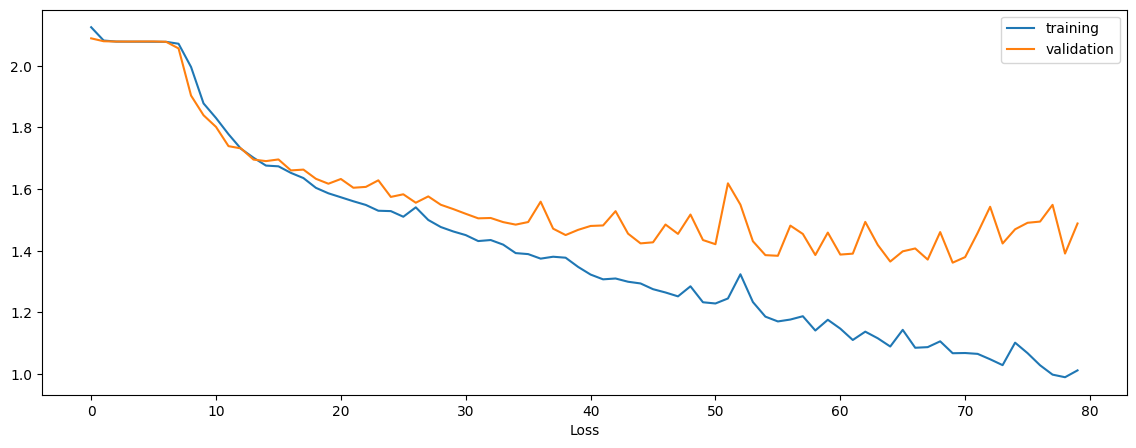

In [6]:
from util import pickleLoad
from visual import plotHistory

history = pickleLoad('source/data/models/{}.pkl'.format(HASH))
plotHistory(history)

In [7]:
from util import getAccuarcy, predictInBatches

print('balanced')
print(getAccuarcy(train[1],predictInBatches(model,train[0],architecture['batch_size'])))
print(getAccuarcy(val[1],predictInBatches(model,val[0],architecture['batch_size'])))
print(getAccuarcy(test[1],predictInBatches(model,test[0],architecture['batch_size'])))

balanced


0.5946521926509809


0.5093656071062751


0.4534598346359057


In [8]:
props2 = props.copy()
props2['balance_data'] = False
gen2 = DataGenerator(**props2)
gen2.clonePCA(gen)
train2, val2, test2 = gen2.getData()

print('original')
print(getAccuarcy(train2[1],predictInBatches(model,train2[0],architecture['batch_size'])))
print(getAccuarcy(val2[1],predictInBatches(model,val2[0],architecture['batch_size'])))
print(getAccuarcy(test2[1],predictInBatches(model,test2[0],architecture['batch_size'])))

original


0.4530225210017929


0.4073232265836307


0.39557672845753217


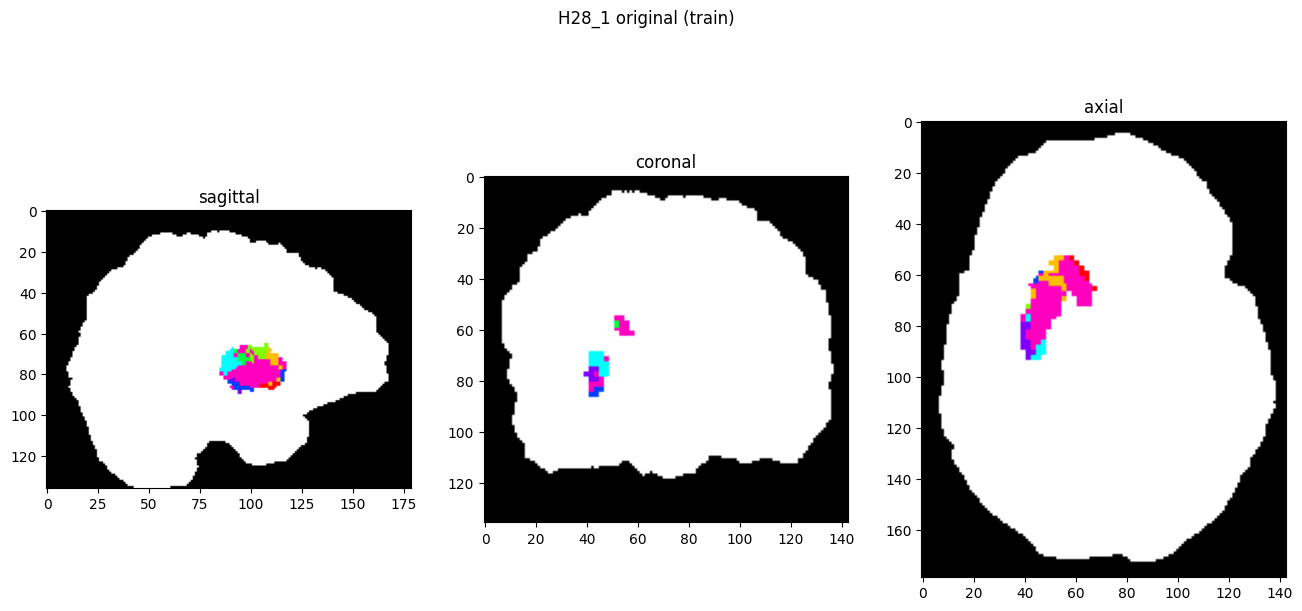

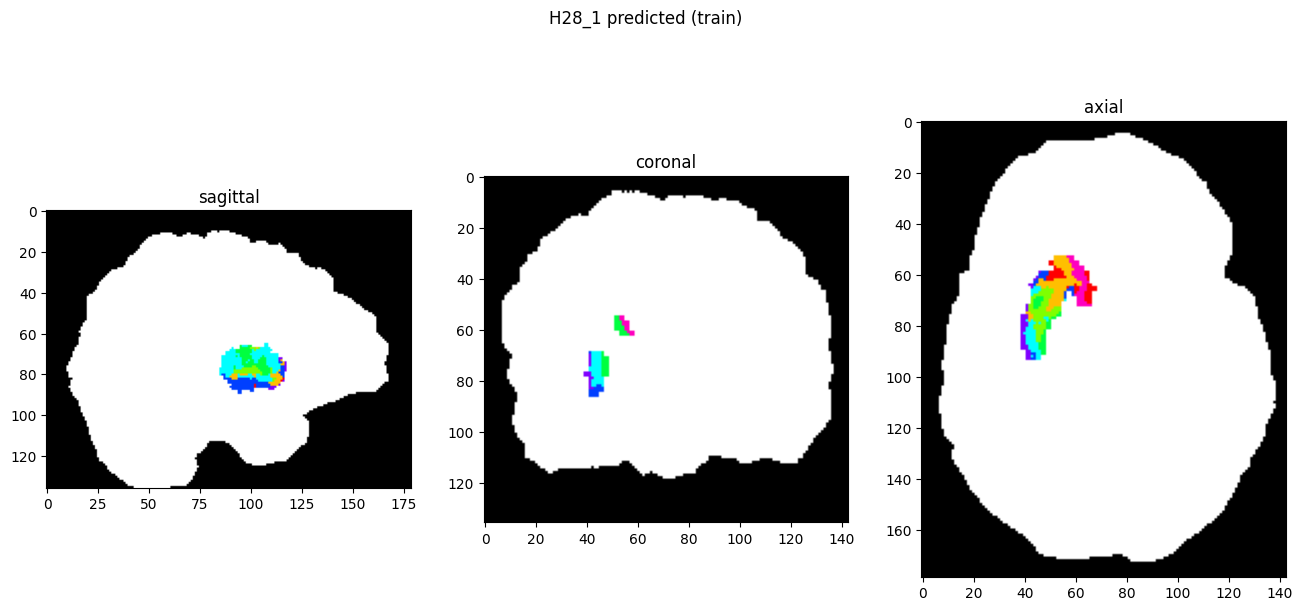

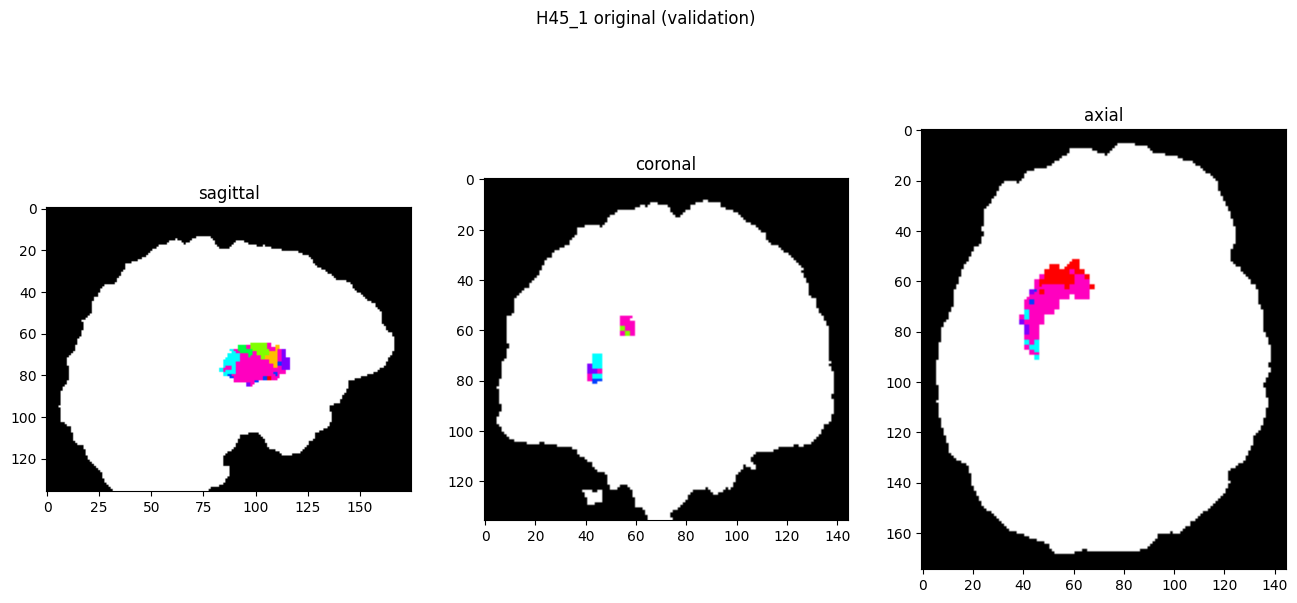

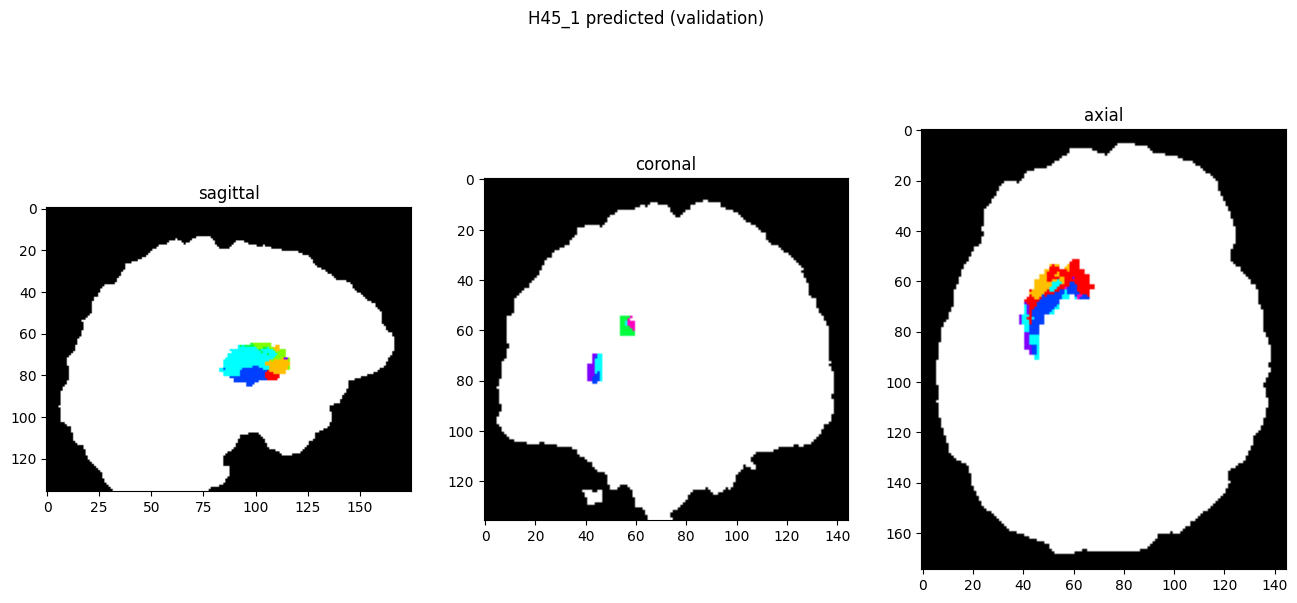

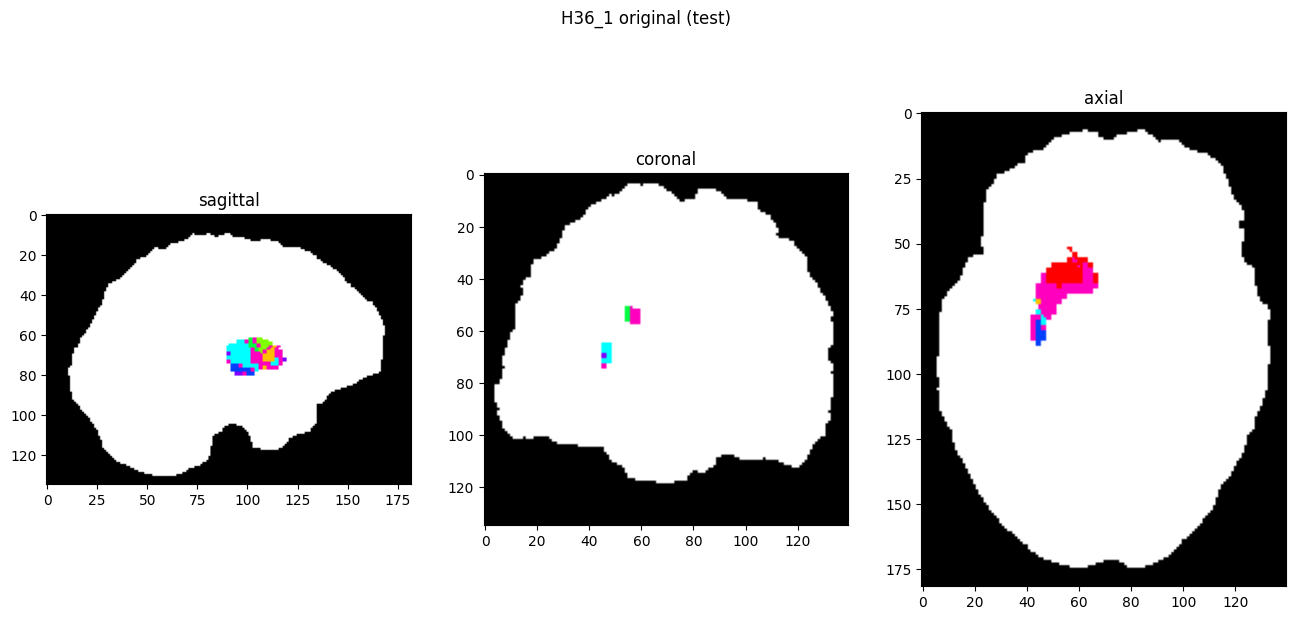

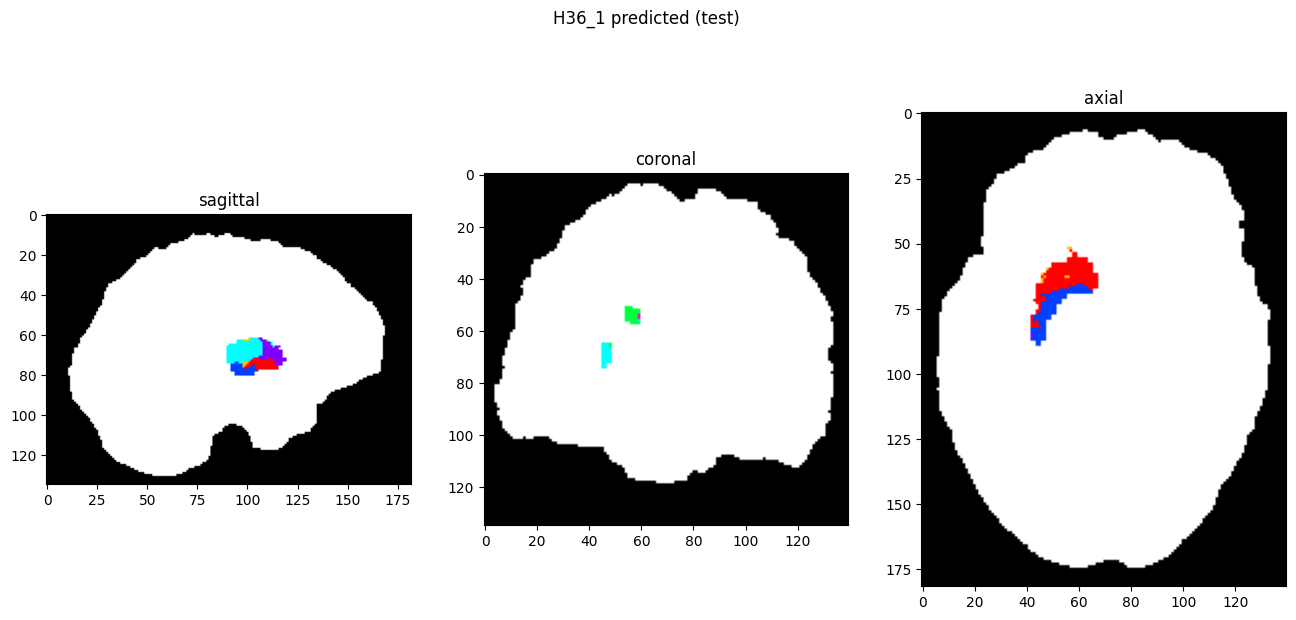

In [9]:
showResults(model, gen, threshold=0)